# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**

### 1. Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
data_2019 = pd.read_csv('/Users/feliorelo/Documents/ACAMICA 2020/Sprint 3/proyecto/flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('/Users/feliorelo/Documents/ACAMICA 2020/Sprint 3/proyecto/flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('/Users/feliorelo/Documents/ACAMICA 2020/Sprint 3/proyecto/flujo-vehicular-2017.csv', sep =',')

In [3]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


periodo       fecha  hora_inicio  hora_fin     dia    estacion    sentido  \
0     2019  2019-01-01            0         1  Martes     Alberti     Centro   
1     2019  2019-01-01            0         1  Martes     Alberti     Centro   
2     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
3     2019  2019-01-01            0         1  Martes     Alberti  Provincia   
4     2019  2019-01-01            0         1  Martes  Avellaneda     Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              22  
1       Liviano    TELEPASE               6  
2       Liviano  NO COBRADO              53  
3       Liviano    TELEPASE              18  
4       Liviano    EFECTIVO              16

In [4]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


periodo       fecha  hora_inicio  hora_fin    dia estacion sentido  \
0     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
1     2018  2018-01-01            0         1  Lunes  Alberdi  Centro   
2     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
3     2018  2018-01-01            1         2  Lunes  Alberdi  Centro   
4     2018  2018-01-01            2         3  Lunes  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              29  
1       Liviano    TELEPASE               9  
2       Liviano  NO COBRADO              73  
3       Liviano    TELEPASE              39  
4       Liviano  NO COBRADO             115

In [5]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


periodo       fecha  hora_inicio  hora_fin      dia estacion sentido  \
0     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
1     2017  2017-01-01            0         1  Domingo  Alberdi  Centro   
2     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
3     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   
4     2017  2017-01-01            1         2  Domingo  Alberdi  Centro   

  tipo_vehiculo  forma_pago  cantidad_pasos  
0       Liviano  NO COBRADO              25  
1       Liviano    TELEPASE               7  
2       Liviano  NO COBRADO               5  
3       Liviano    EFECTIVO               2  
4       Liviano    EFECTIVO              94

Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [6]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [7]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [8]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [9]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


##### Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


In [10]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset.head()

fecha  hora_fin     dia    sentido tipo_vehiculo  cantidad_pasos
80   2019-01-01         2  Martes     Centro       Liviano             537
86   2019-01-01         2  Martes     Centro        Pesado               1
88   2019-01-01         2  Martes  Provincia       Liviano             443
94   2019-01-01         2  Martes  Provincia        Pesado               1
149  2019-01-01         3  Martes     Centro       Liviano             769

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238869 entries, 80 to 1372326
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   fecha           238869 non-null  object
 1   hora_fin        238869 non-null  int64 
 2   dia             238869 non-null  object
 3   sentido         238869 non-null  object
 4   tipo_vehiculo   238869 non-null  object
 5   cantidad_pasos  238869 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 12.8+ MB


In [12]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)

dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos              fecha2
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [13]:
#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset.head()

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
80   Martes     Centro       Liviano             537 2019-01-01 02:00:00
86   Martes     Centro        Pesado               1 2019-01-01 02:00:00
88   Martes  Provincia       Liviano             443 2019-01-01 02:00:00
94   Martes  Provincia        Pesado               1 2019-01-01 02:00:00
149  Martes     Centro       Liviano             769 2019-01-01 03:00:00

In [14]:
#Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

dia    sentido tipo_vehiculo  cantidad_pasos               fecha
0       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
1       Domingo  Provincia       Liviano               9 2017-01-01 00:00:00
2       Domingo  Provincia       Liviano             644 2017-01-01 00:00:00
3       Domingo  Provincia        Pesado               6 2017-01-01 00:00:00
4       Domingo  Provincia        Pesado               1 2017-01-01 00:00:00
...         ...        ...           ...             ...                 ...
238864   Martes  Provincia       Liviano             556 2019-12-31 22:00:00
238865   Martes  Provincia        Pesado               1 2019-12-31 22:00:00
238866   Martes     Centro       Liviano             580 2019-12-31 22:00:00
238867   Martes     Centro       Liviano             214 2019-12-31 23:00:00
238868   Martes  Provincia       Liviano             190 2019-12-31 23:00:00

[238869 rows x 5 columns]

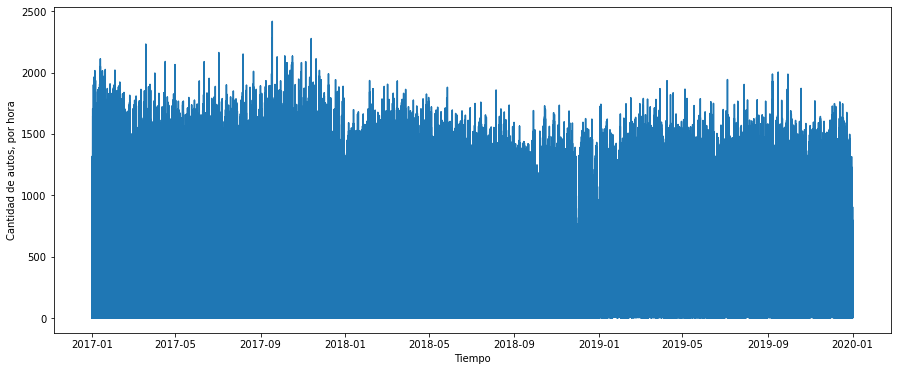

In [15]:
#Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por hora')
plt.show()

In [16]:
#Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
print(diario.shape)
diario.head()

(1095, 1)


cantidad_pasos
fecha                     
2017-01-01           31183
2017-01-02           51568
2017-01-03           51093
2017-01-04           53332
2017-01-05           56486

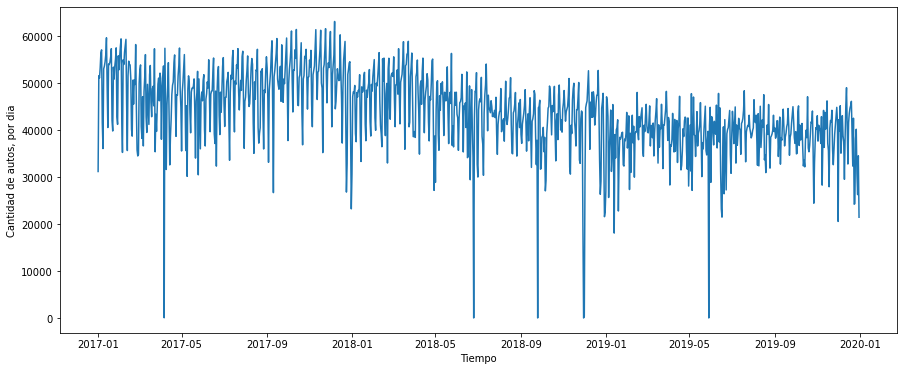

In [17]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

# Parte A: Analisis Exploratorio

A partir de este momento comenzaremos con el analisis exploratorio de los datos. Lo primero que haremos sera observar los valores outliers que encontramos en la Serie de Tiempo.

Como podemos observar existen datos que tienen valores nulos, esto se puede dar por varios motivos, por ejemplo, fallas en sistemas, cortes, piquetas,etc. Lo bueno que estos dias no son más de 6 valores.

Observando los valores atípicos.

In [18]:
outliers = diario[diario.cantidad_pasos<10000] 

In [19]:
outliers

cantidad_pasos
fecha                     
2017-04-06              40
2018-06-25               0
2018-09-25               0
2018-11-30               0
2018-12-01             350
2019-05-29               0

 Por ejemplo: Si googleamos la primer fecha encontramos que ese día existio un paro de distintos movimientos. Esto derivo en un corte de la autopista por eso el número tan bajo de autos. En el caso del día 2018-12-01, encontramos que el corte fue ocacionado por la cumbre del G20.

Una vez observados estos outliers, lo primero que haremos sera separar en dos nuestros datos teniendo en cuenta el sentido. Un dataset quedara para los datos con dirección centro y otro en dirección provincia.

## Una vez separados los datos, lo que haremos sera tratar de responder algunas preguntas:
    •Cuál es la estación más transcurrida?
    
    •Qué día es el más concurrido?
    
    •Qué horarios son los más transitados?
   
    •Influye el sentido en cuanto a la cantidad de tráfico y a los horarios picos?
   
    •Cuál es la tendencia en cada sentido? Tiende a crecer? Disminuye?
    
    •Varia el comportamiento semanal con el paso de los años?

In [20]:
#Cantidad total de pasos (porcentual) Vs estación (intervalo 2017 - 2019)
dataset_a = pd.concat([data_2019, data_2018, data_2017])
dataset_analisis=dataset_a.groupby([dataset_a.estacion])['cantidad_pasos'].sum().to_frame().reset_index().sort_values(by='cantidad_pasos', ascending=False)
dataset_analisis.cantidad_pasos=round(100*(dataset_analisis.cantidad_pasos/dataset_analisis.cantidad_pasos.sum()),1)
dataset_analisis.head(2)

estacion  cantidad_pasos
2  Avellaneda            39.7
6       Illia            27.3

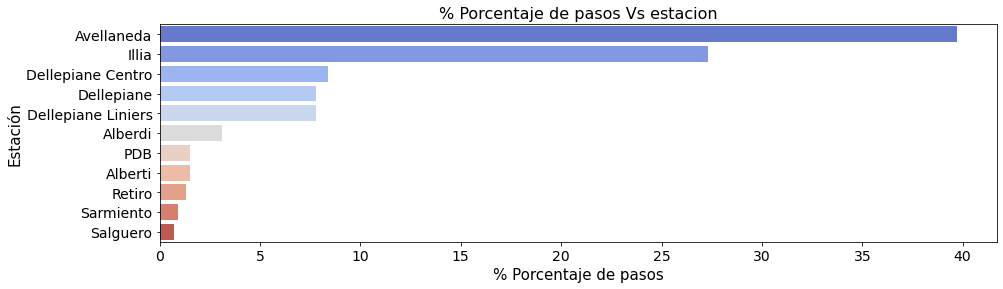

In [21]:
plt.figure(figsize=(15, 4))
sns.barplot(y="estacion", 
            x="cantidad_pasos", 
            data=dataset_analisis,
            palette= "coolwarm"
            )

#Formato de la gráfica
plt.title('% Porcentaje de pasos Vs estacion',fontsize=16)
plt.xlabel('% Porcentaje de pasos', fontsize=15)
plt.ylabel('Estación', fontsize=15)
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tick_params(labelsize=14)
plt.show()

Podemos observar que la estación bajo estudio, estación Illia, es una de las estaciones que mayores cantidad de pasos presenta. Esto nos da una idea de que esta estación puede ser representativa en cuanto al comportamiento del total de pasos.

In [22]:
#Luego de analizadas las distintas estaciones lo que haremos sera investigar el comportamiento teniendo en cuenta los distintos sentidos

## Comenzamos con una analisis del trafico en sentido Centro.

In [23]:
centro = dataset[dataset.sentido=="Centro"]
centro.head(3)

dia sentido tipo_vehiculo  cantidad_pasos      fecha
6  Domingo  Centro       Liviano              23 2017-01-01
7  Domingo  Centro        Pesado               1 2017-01-01
8  Domingo  Centro        Pesado              21 2017-01-01

In [24]:
provincia = dataset[dataset.sentido=="Provincia"]
provincia.head(3)

dia    sentido tipo_vehiculo  cantidad_pasos      fecha
0  Domingo  Provincia        Pesado               1 2017-01-01
1  Domingo  Provincia       Liviano               9 2017-01-01
2  Domingo  Provincia       Liviano             644 2017-01-01

In [25]:
centro.head(5)

dia sentido tipo_vehiculo  cantidad_pasos      fecha
6   Domingo  Centro       Liviano              23 2017-01-01
7   Domingo  Centro        Pesado               1 2017-01-01
8   Domingo  Centro        Pesado              21 2017-01-01
9   Domingo  Centro        Pesado              10 2017-01-01
10  Domingo  Centro        Pesado               1 2017-01-01

In [26]:
centro_prom = centro.resample('D', on = 'fecha').sum()
print(centro_prom.shape)
centro_prom.head()

(1095, 1)


cantidad_pasos
fecha                     
2017-01-01           17051
2017-01-02           27825
2017-01-03           27567
2017-01-04           28949
2017-01-05           30820

In [27]:
centro_dias_promedio = centro_prom.pivot_table(values = 'cantidad_pasos',
                                index = 'fecha', 
                                aggfunc = 'mean')
centro_dias_promedio = centro_dias_promedio.reset_index()
centro_dias_promedio.head(7)

fecha  cantidad_pasos
0 2017-01-01           17051
1 2017-01-02           27825
2 2017-01-03           27567
3 2017-01-04           28949
4 2017-01-05           30820
5 2017-01-06           30721
6 2017-01-07           21685

In [28]:
df_1 = pd.DataFrame(pd.date_range(start='1/1/2017', end='31/12/2019')).rename(columns={0:'Date'})

In [29]:
centro_dias_promedio.reset_index(inplace=True)

In [30]:
promedio_centro = df_1.merge(centro_dias_promedio, left_on="Date",right_on="fecha", how="left")

In [31]:
promedio_centro

Date  index      fecha  cantidad_pasos
0    2017-01-01      0 2017-01-01           17051
1    2017-01-02      1 2017-01-02           27825
2    2017-01-03      2 2017-01-03           27567
3    2017-01-04      3 2017-01-04           28949
4    2017-01-05      4 2017-01-05           30820
...         ...    ...        ...             ...
1090 2019-12-27   1090 2019-12-27           21187
1091 2019-12-28   1091 2019-12-28           15995
1092 2019-12-29   1092 2019-12-29           13715
1093 2019-12-30   1093 2019-12-30           18599
1094 2019-12-31   1094 2019-12-31           10975

[1095 rows x 4 columns]

In [32]:
promedio_centro['day_of_week'] = promedio_centro['Date'].dt.dayofweek

days = {0:'Lunes',1:'Martes',2:'Miércoles',3:'Jueves',4:'Viernes',5:'Sábado',6:'Domingo'}

promedio_centro['Date'] = promedio_centro['day_of_week'].apply(lambda x: days[x])

In [33]:
promedio_centro

Date  index      fecha  cantidad_pasos  day_of_week
0       Domingo      0 2017-01-01           17051            6
1         Lunes      1 2017-01-02           27825            0
2        Martes      2 2017-01-03           27567            1
3     Miércoles      3 2017-01-04           28949            2
4        Jueves      4 2017-01-05           30820            3
...         ...    ...        ...             ...          ...
1090    Viernes   1090 2019-12-27           21187            4
1091     Sábado   1091 2019-12-28           15995            5
1092    Domingo   1092 2019-12-29           13715            6
1093      Lunes   1093 2019-12-30           18599            0
1094     Martes   1094 2019-12-31           10975            1

[1095 rows x 5 columns]

In [34]:
order_days = ["Lunes","Martes","Miércoles","Jueves","Viernes","Sábado","Domingo"]

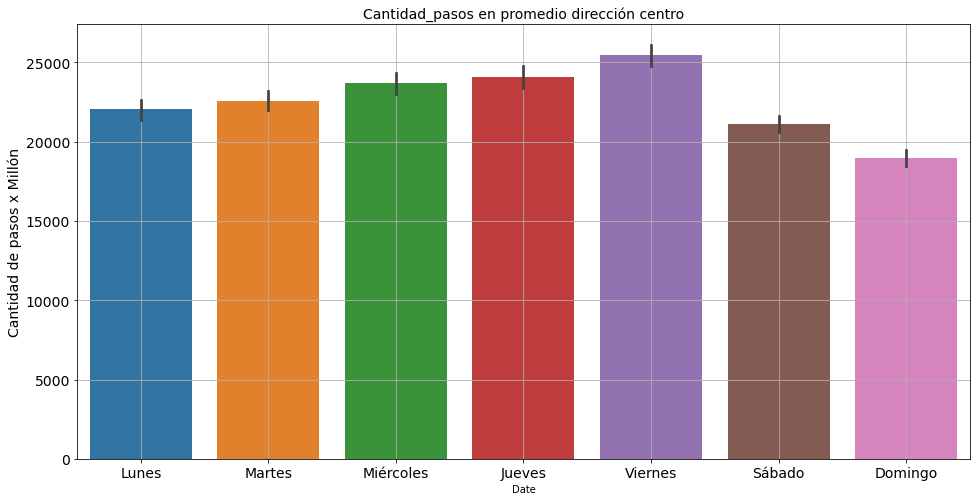

In [35]:
plt.figure(figsize = (16,8))
sns.barplot(data = promedio_centro, y ='cantidad_pasos', x= 'Date', order = order_days)
plt.title('Cantidad_pasos en promedio dirección centro', fontsize = 14)
plt.ylabel('Cantidad de pasos x Millón', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()

Podemos observar que el día Viernes tiene la mayor cantidad de pasos promedio de autos, con un promedio de 211 pasos por día.

In [36]:
centro_dias = centro.pivot_table(values = 'cantidad_pasos',
                                index = 'dia', 
                                aggfunc = 'sum')
centro_dias = centro_dias.reset_index()
centro_dias.head(7)

dia  cantidad_pasos
0    Domingo         2978394
1     Jueves         3756857
2      Lunes         3459619
3     Martes         3546712
4  Miércoles         3694598
5     Sábado         3295920
6    Viernes         3975266

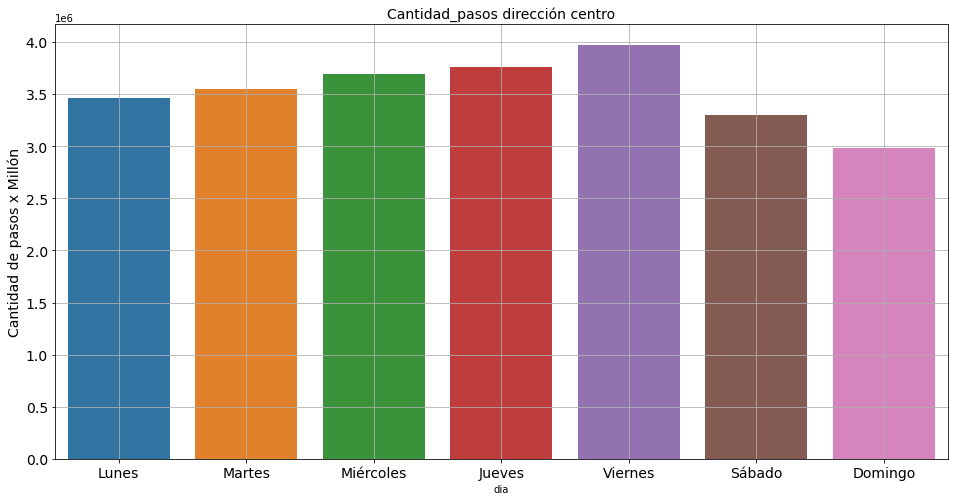

In [37]:
#Sumatoria de cantidad de pasos en los años bajo estudio
plt.figure(figsize = (16,8))
sns.barplot(data = centro_dias, y ='cantidad_pasos', x= 'dia', order = order_days)
plt.title('Cantidad_pasos dirección centro', fontsize = 14)
plt.ylabel('Cantidad de pasos x Millón', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()

Podemos observar que la cantidad de tráfico en sentido Centro se mantiene constante en el transcurso de la semana, alcanzando el maximo de 4M de pasos el día viernes y el mínimo el día domingo con 3M de pasos.

In [38]:
#Observemos si existe alguna variación en el transcurso de las horas

In [39]:
centro['horas']= centro['fecha'].dt.hour

<ipython-input-39-7e7b5d6c34dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  centro['horas']= centro['fecha'].dt.hour


In [40]:
#centro

In [41]:
centro_horas = centro.pivot_table(values = 'cantidad_pasos',
                                index = ['dia','horas'], 
                                aggfunc = 'sum')
centro_horas = centro_horas.reset_index()
centro_horas.head()

dia  horas  cantidad_pasos
0  Domingo      0           91070
1  Domingo      1           84397
2  Domingo      2           75607
3  Domingo      3           59124
4  Domingo      4           40995

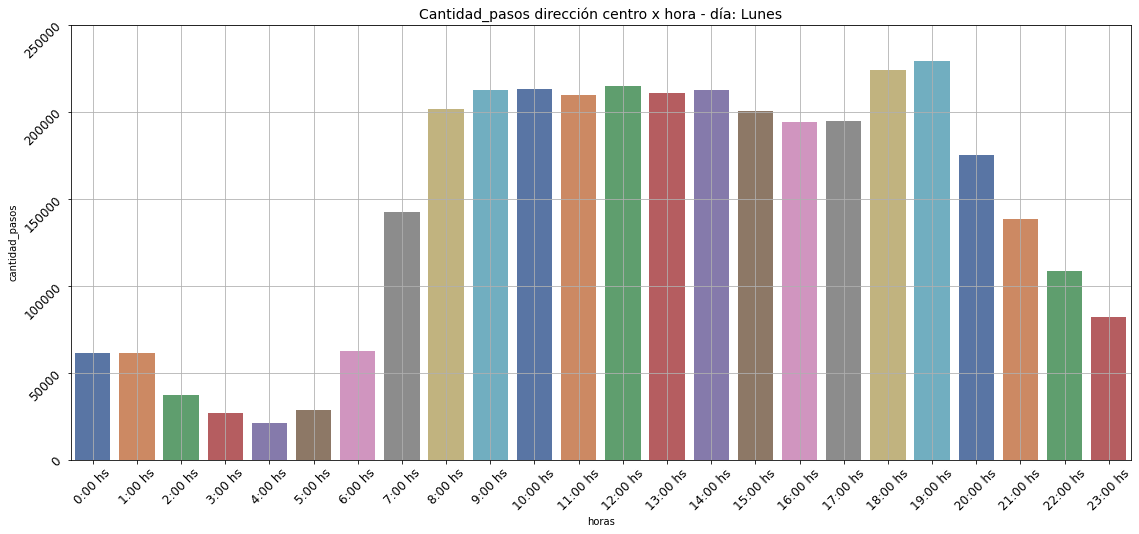

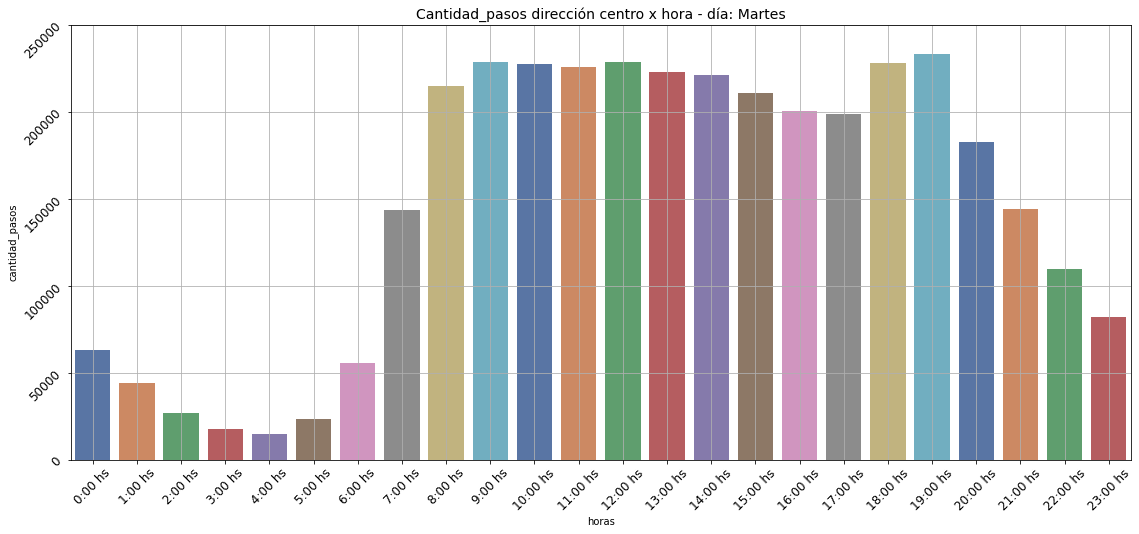

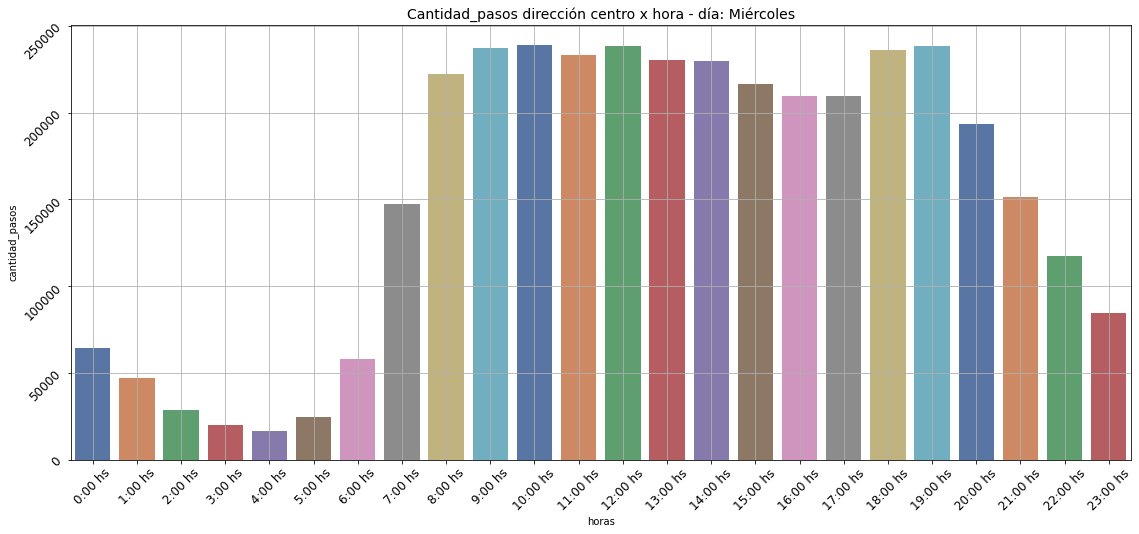

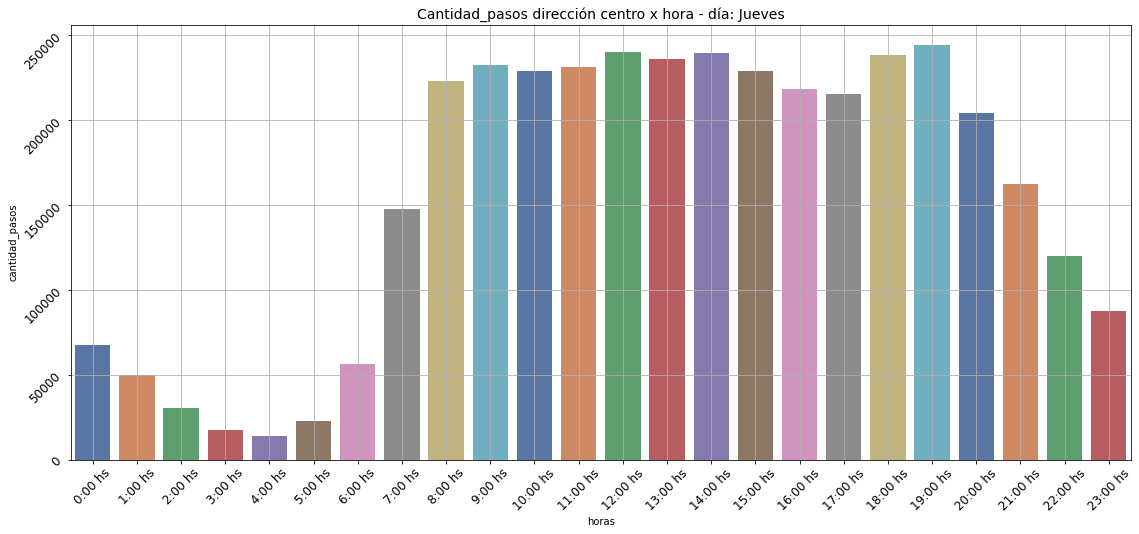

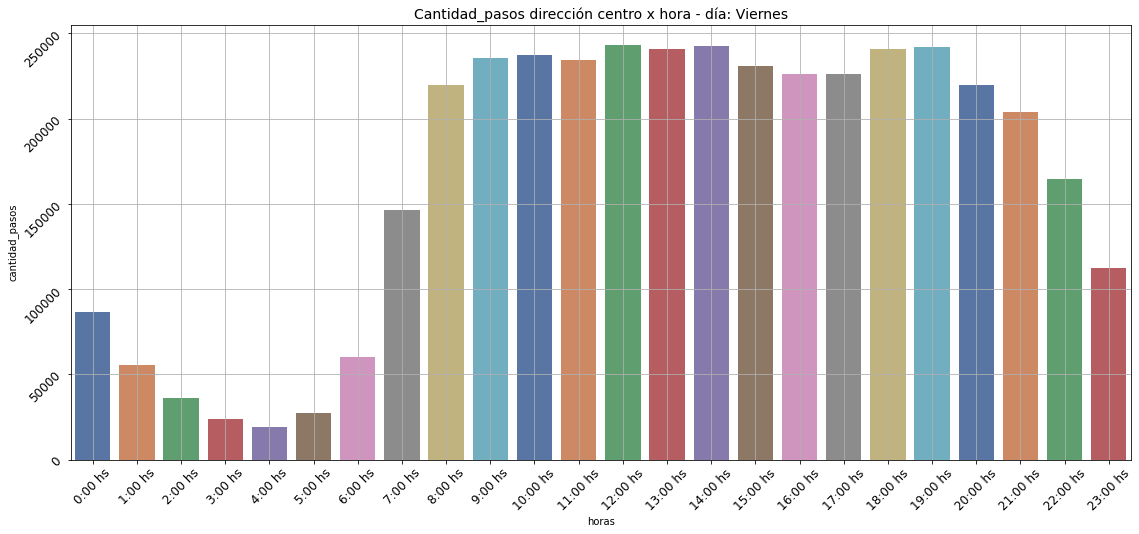

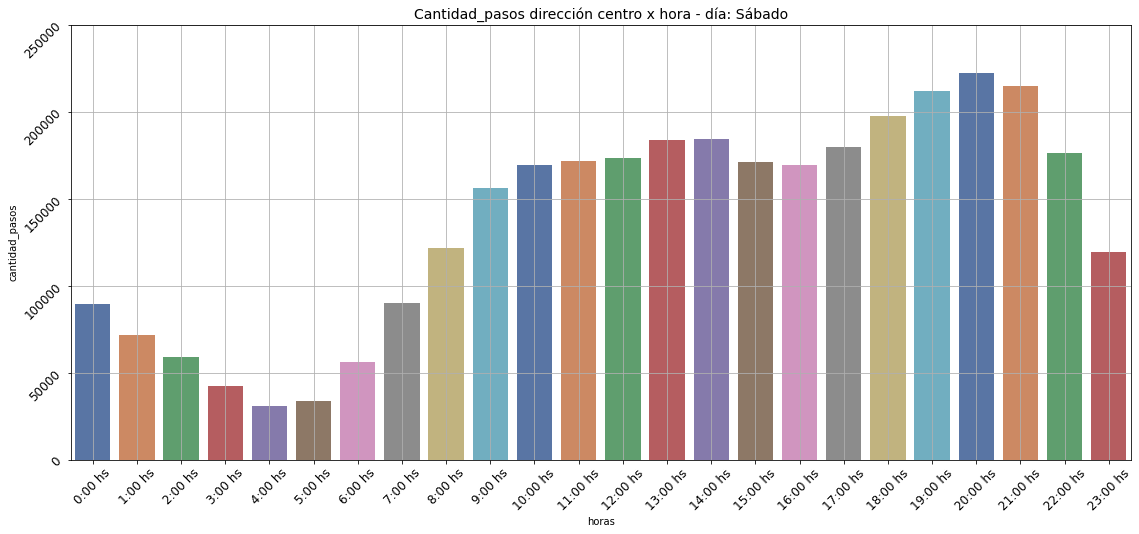

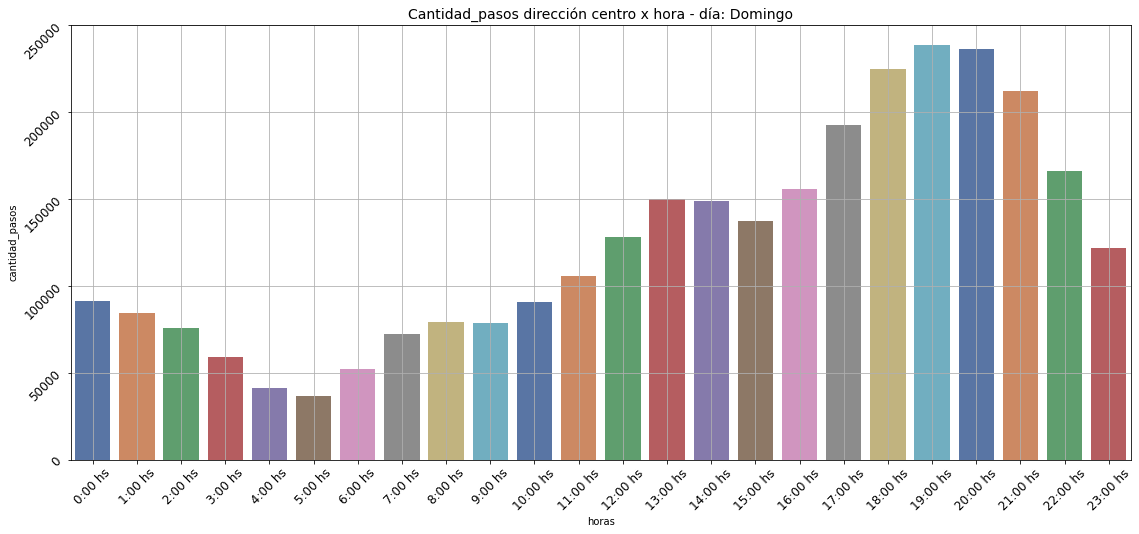

In [42]:
for dia in order_days:
    plt.figure(figsize = (19,8))
    sns.barplot(data = centro_horas[centro_horas['dia']== dia], x='horas', y ='cantidad_pasos', palette="deep")
    plt.title('Cantidad_pasos dirección centro x hora - día: '+dia, fontsize = 14)
    #plt.ylabel('Cantidad de pasos x Millón', fontsize = 14)
    plt.xticks(range(24),
               [str(i) +':00 hs' for i in range(24)],
               rotation = 45,
               fontsize = 12)
    plt.yticks(range(0, 3*10**5,5*10**4),
               [str(i) for i in range(0, 3*10**5,5*10**4)],
               rotation = 45,
               fontsize = 12)
    plt.grid()

In [43]:
centro_horas1 = centro.pivot_table(values = 'cantidad_pasos',
                                index = ['dia','horas'], 
                                aggfunc = 'mean')
centro_horas1 = centro_horas1.reset_index()
centro_horas1.head()

dia  horas  cantidad_pasos
0  Domingo      0      127.015342
1  Domingo      1      134.390127
2  Domingo      2      124.970248
3  Domingo      3       97.403624
4  Domingo      4       69.957338

In [44]:
mapa_centro = centro_horas1.pivot_table(values = 'cantidad_pasos', index = 'dia', columns = 'horas').loc[order_days]
mapa_centro

horas              0           1           2          3          4   \
dia                                                                   
Lunes       85.977560   87.745690   54.992560  41.655864  31.818043   
Martes      89.395448   65.046062   40.016616  28.131621  23.196875   
Miércoles   90.196906   66.115331   41.565982  31.913183  26.637380   
Jueves      92.743132   71.496423   44.510294  27.548031  21.738654   
Viernes    123.209700   78.168317   52.510116  37.149923  30.549606   
Sábado     140.100000  105.960177   85.406386  66.131661  47.027692   
Domingo    127.015342  134.390127  124.970248  97.403624  69.957338   

horas             5          6           7           8           9   ...  \
dia                                                                  ...   
Lunes      42.654135  86.361111  175.835600  262.208062  266.120301  ...   
Martes     35.726300  76.245879  175.479853  273.635669  289.972117  ...   
Miércoles  35.836257  79.589532  172.377778  266.860911  297.229036  ...   
Jueves     34.934451  76.906849  173.762073  277.225124  286.210332  ...   
Viernes    40.845577  82.986264  177.278788  277.660354  293.280199  ...   
Sábado     52.353941  80.496413  115.106003  158.027273  200.229487  ...   
Domingo    61.663317  83.769726  110.372129  115.187228  116.633929  ...   

horas              14          15          16          17          18  \
dia                                                                     
Lunes      257.133172  246.664207  229.057920  237.282582  275.798030   
Martes     265.013174  258.739877  237.648104  240.228537  276.290909   
Miércoles  264.861751  249.612457  238.380682  244.822637  280.182898   
Jueves     277.580533  267.453801  250.823192  252.505275  288.707022   
Viernes    276.038724  261.657596  258.822451  260.639401  290.304819   
Sábado     232.496847  225.961691  218.106959  236.146982  249.910127   
Domingo    201.914402  187.369210  205.819022  244.228426  288.391026   

horas              19          20          21          22          23  
dia                                                                    
Lunes      283.530941  228.246415  184.046667  147.482289  113.013812  
Martes     289.143921  234.066667  187.848564  151.013812  118.265896  
Miércoles  296.042184  242.171464  198.445026  158.342318  118.008380  
Jueves     295.758788  255.872340  216.684000  164.867950  122.206128  
Viernes    296.244798  275.761606  264.454663  223.067751  158.304225  
Sábado     276.653595  289.083225  289.662618  261.339259  181.654490  
Domingo    312.893701  308.716340  273.866925  229.265193  170.255230  

[7 rows x 24 columns]

Text(0.5, 1.0, 'heatmap cantidad de autos promedio x hora (sentido Centro)')

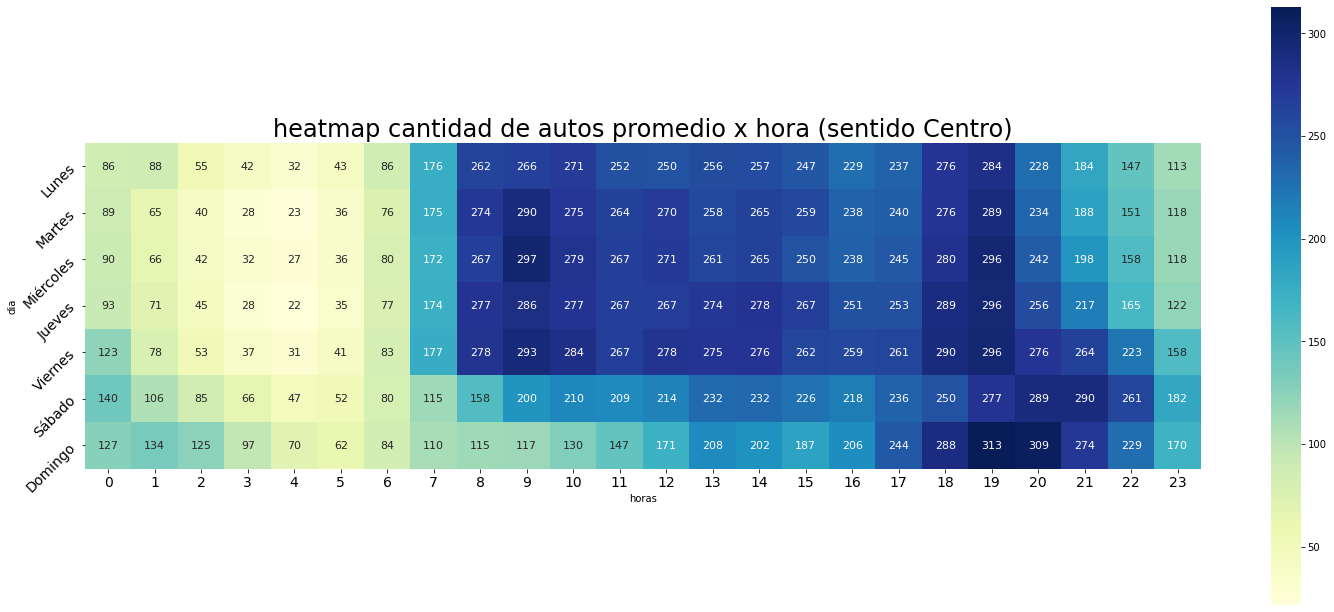

In [45]:
plt.figure(figsize = (25,11))
sns.heatmap(mapa_centro,
           cbar = True,
           square = True, 
           annot =True,
           fmt = '.0f',
           annot_kws = {'size':11},
           cmap="YlGnBu")
plt.xticks(fontsize = 14)
plt.yticks(rotation = 45, fontsize = 14)
plt.title('heatmap cantidad de autos promedio x hora (sentido Centro)', fontsize = 24)

In [46]:
centro.head(1)

dia sentido tipo_vehiculo  cantidad_pasos      fecha  horas
6  Domingo  Centro       Liviano              23 2017-01-01      0

In [47]:
#Luego observamos si este comportamiento diario, varia en el transcurso de los años

In [48]:
centro['año']= centro['fecha'].dt.year

<ipython-input-48-dc0e27400acc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  centro['año']= centro['fecha'].dt.year


In [49]:
centro_dias_ano = centro.pivot_table(values = 'cantidad_pasos',
                                index = 'dia',
                                columns = 'año',
                                aggfunc = 'sum')
centro_dias_ano = centro_dias_ano.reset_index()
centro_dias_ano.head()

año        dia     2017     2018     2019
0      Domingo  1075772   968775   933847
1       Jueves  1424656  1245788  1086413
2        Lunes  1313615  1136999  1009005
3       Martes  1339786  1167203  1039723
4    Miércoles  1432727  1223054  1038817

In [50]:
from pandas.api.types import CategoricalDtype
cat_size_order = CategoricalDtype(
    ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], 
    ordered=True)

In [51]:
#Dividimos nuestro dataset teniendo en cuenta el comportamiento de los distintos días por año.
a = pd.melt(centro_dias_ano,['dia'])
a['dia'] = a['dia'].astype(cat_size_order)
a.sort_values('dia', inplace = True)

/Users/feliorelo/opt/anaconda3/envs/acamicaserie/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/feliorelo/opt/anaconda3/envs/acamicaserie/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/feliorelo/opt/anaconda3/envs/acamicaserie/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an 

Text(0.5, 0, 'Sentido = Centro')

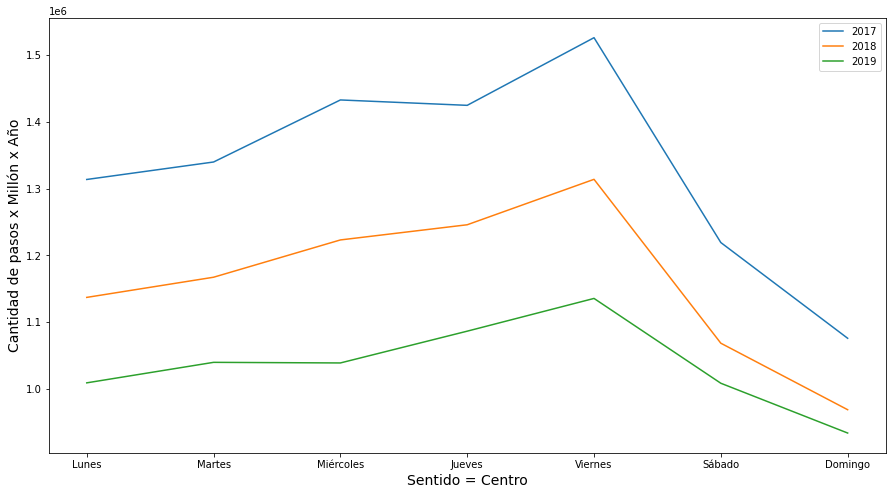

In [52]:
plt.figure(figsize = (15,8))
df1 = a[a["año"]==2017]
df2 = a[a["año"]==2018]
df3 = a[a["año"]==2019]
x_col='dia'
y_col = 'value'
sns.lineplot(df1.dia, df1["value"], label = '2017')
sns.lineplot(df2.dia, df2["value"], label = '2018')
sns.lineplot(df3.dia, df3["value"], label = '2019')
plt.ylabel('Cantidad de pasos x Millón x Año', fontsize = 14)
plt.xlabel('Sentido = Centro', fontsize = 14)

#Vemos que existe un comportamiento similar en cuanto a los días de mayor transito de la semana,  pero observamos que año a año existe una disminución en la cantidad de los pasos.

## Ahora analisamos los datos en sentido Provincia

In [53]:
provincia.head(3)

dia    sentido tipo_vehiculo  cantidad_pasos      fecha
0  Domingo  Provincia        Pesado               1 2017-01-01
1  Domingo  Provincia       Liviano               9 2017-01-01
2  Domingo  Provincia       Liviano             644 2017-01-01

In [54]:
provincia_prom = provincia.resample('D', on = 'fecha').sum()
print(provincia_prom.shape)
provincia_prom.head()

(1095, 1)


cantidad_pasos
fecha                     
2017-01-01           14132
2017-01-02           23743
2017-01-03           23526
2017-01-04           24383
2017-01-05           25666

In [55]:
provincia_dias_promedio = provincia_prom.pivot_table(values = 'cantidad_pasos',
                                index = 'fecha', 
                                aggfunc = 'mean')
provincia_dias_promedio = provincia_dias_promedio.reset_index()
centro_dias_promedio.head(2)

index      fecha  cantidad_pasos
0      0 2017-01-01           17051
1      1 2017-01-02           27825

In [56]:
df_2 = pd.DataFrame(pd.date_range(start='1/1/2017', end='31/12/2019')).rename(columns={0:'Date'})

provincia_dias_promedio.reset_index(inplace=True)


promedio_provincia = df_2.merge(provincia_dias_promedio, left_on="Date",right_on="fecha", how="left")

promedio_provincia['day_of_week'] = promedio_provincia['Date'].dt.dayofweek

days = {0:'Lunes',1:'Martes',2:'Miércoles',3:'Jueves',4:'Viernes',5:'Sábado',6:'Domingo'}

promedio_provincia['Date'] = promedio_provincia['day_of_week'].apply(lambda x: days[x])
promedio_provincia

Date  index      fecha  cantidad_pasos  day_of_week
0       Domingo      0 2017-01-01           14132            6
1         Lunes      1 2017-01-02           23743            0
2        Martes      2 2017-01-03           23526            1
3     Miércoles      3 2017-01-04           24383            2
4        Jueves      4 2017-01-05           25666            3
...         ...    ...        ...             ...          ...
1090    Viernes   1090 2019-12-27           18995            4
1091     Sábado   1091 2019-12-28           14686            5
1092    Domingo   1092 2019-12-29           12544            6
1093      Lunes   1093 2019-12-30           15924            0
1094     Martes   1094 2019-12-31           10472            1

[1095 rows x 5 columns]

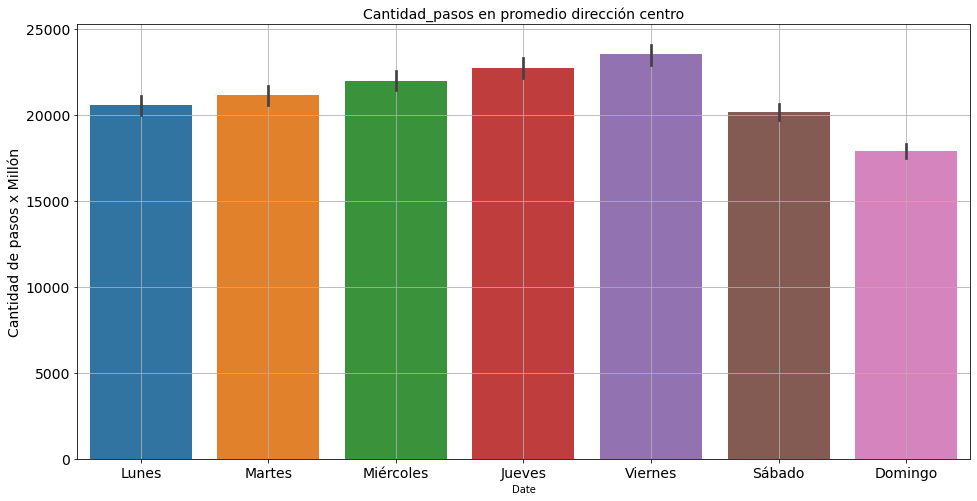

In [57]:
plt.figure(figsize = (16,8))
sns.barplot(data = promedio_provincia, y ='cantidad_pasos', x= 'Date', order = order_days)
plt.title('Cantidad_pasos en promedio dirección centro', fontsize = 14)
plt.ylabel('Cantidad de pasos x Millón', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()

In [58]:
provincia_dias = provincia.pivot_table(values = 'cantidad_pasos',
                                index = 'dia', 
                                aggfunc = 'sum')
provincia_dias = provincia_dias.reset_index()
provincia_dias.head(7)

dia  cantidad_pasos
0    Domingo         2813567
1     Jueves         3545312
2      Lunes         3231768
3     Martes         3318839
4  Miércoles         3430928
5     Sábado         3145795
6    Viernes         3672006

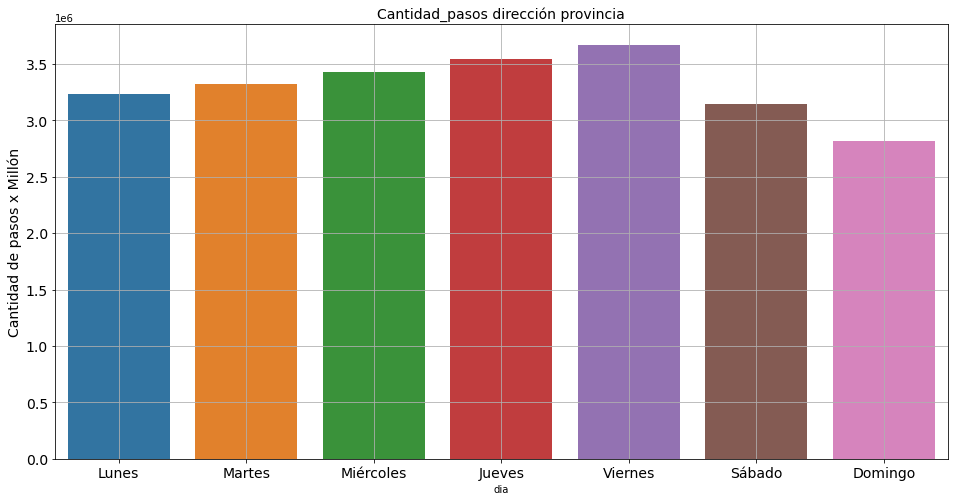

In [59]:
plt.figure(figsize = (16,8))
sns.barplot(data = provincia_dias, y ='cantidad_pasos', x= 'dia', order = order_days)
plt.title('Cantidad_pasos dirección provincia', fontsize = 14)
plt.ylabel('Cantidad de pasos x Millón', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.grid()

In [60]:
#Luego observamos si existe alguna variación en el transcurso de las horas

In [61]:
provincia['horas']= provincia['fecha'].dt.hour

<ipython-input-61-8bc4506f091e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  provincia['horas']= provincia['fecha'].dt.hour


In [62]:
provincia_horas = provincia.pivot_table(values = 'cantidad_pasos',
                                index = ['dia','horas'], 
                                aggfunc = 'sum')
provincia_horas = provincia_horas.reset_index()
provincia_horas.head()

dia  horas  cantidad_pasos
0  Domingo      0           84433
1  Domingo      1           90495
2  Domingo      2           83329
3  Domingo      3           67369
4  Domingo      4           43223

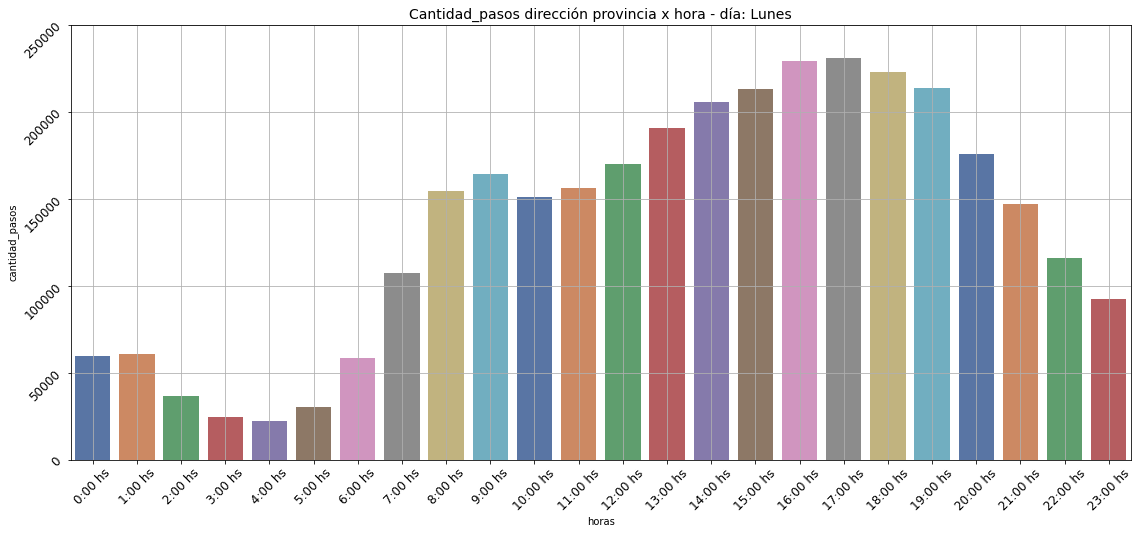

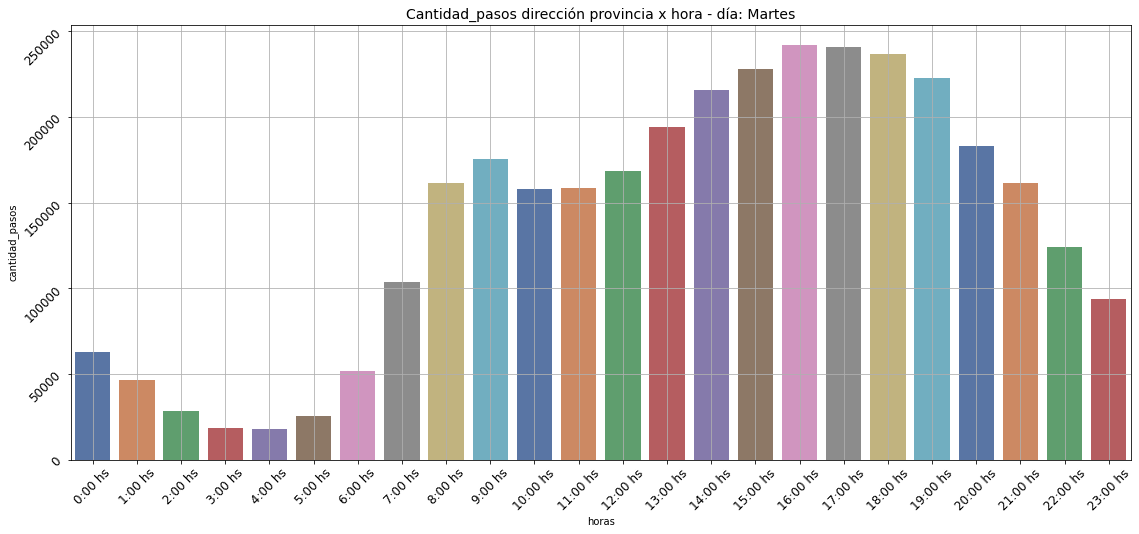

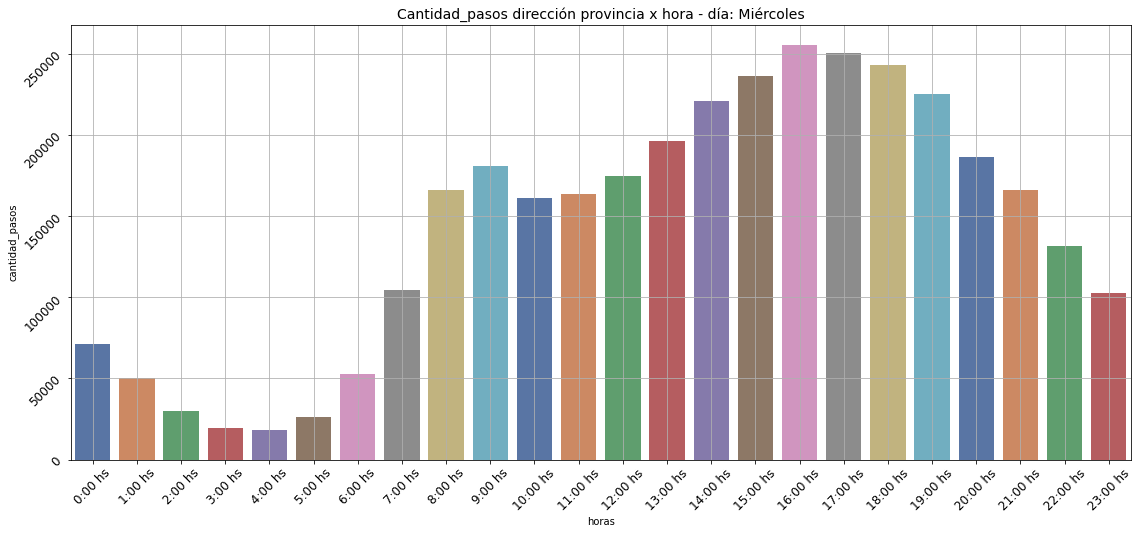

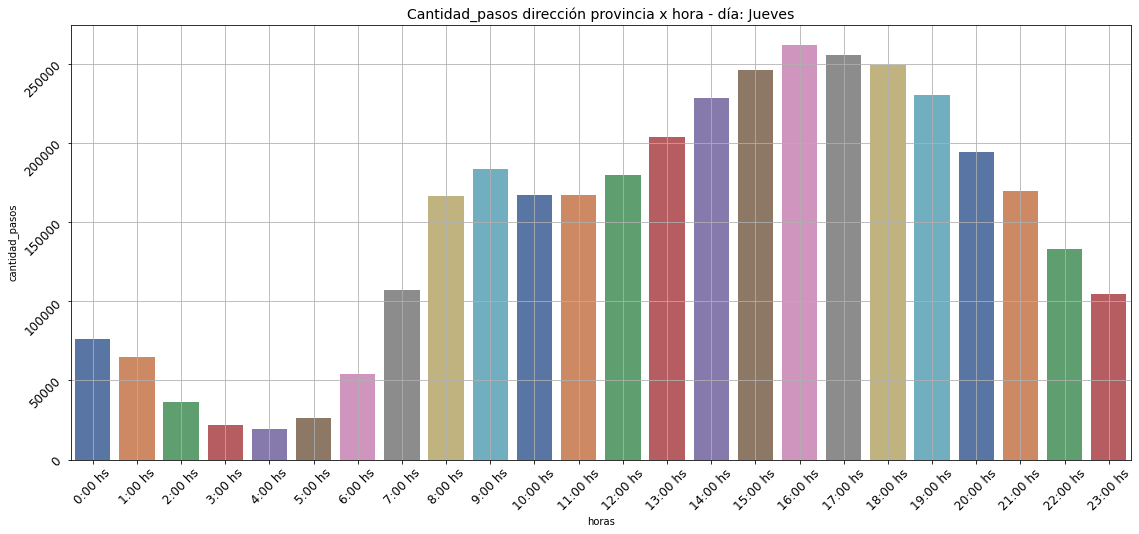

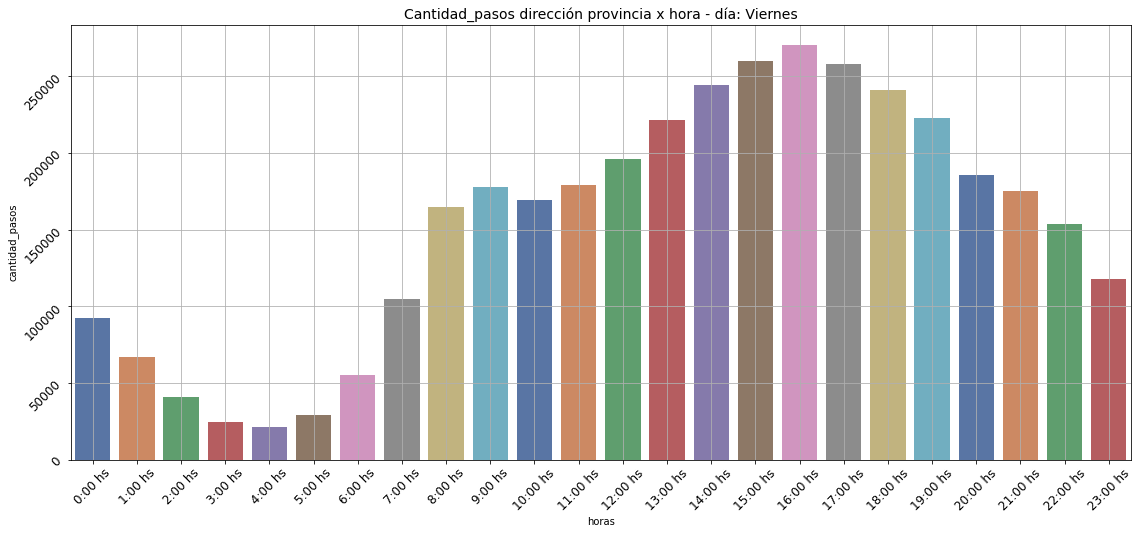

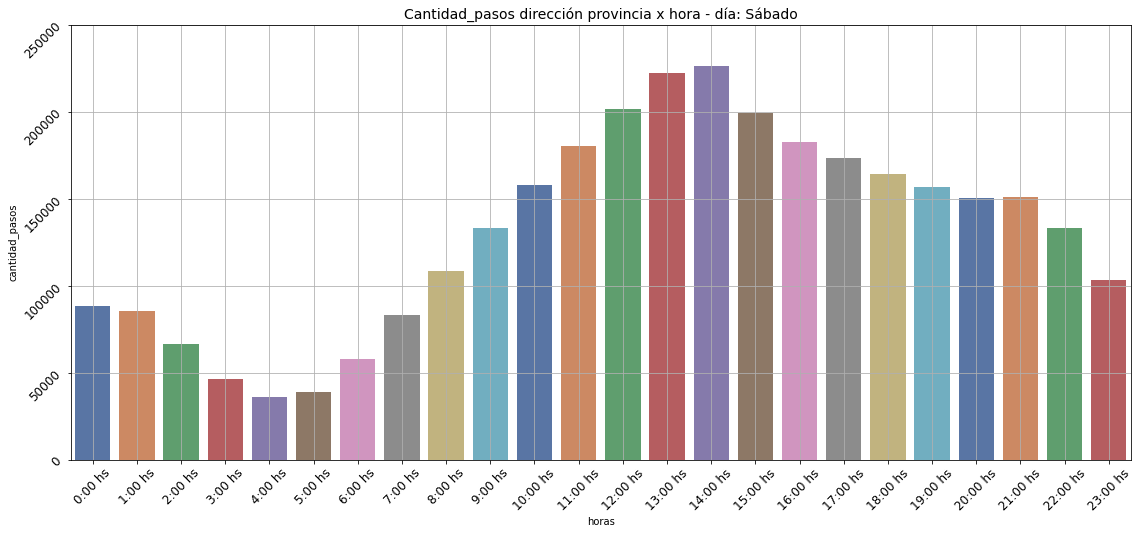

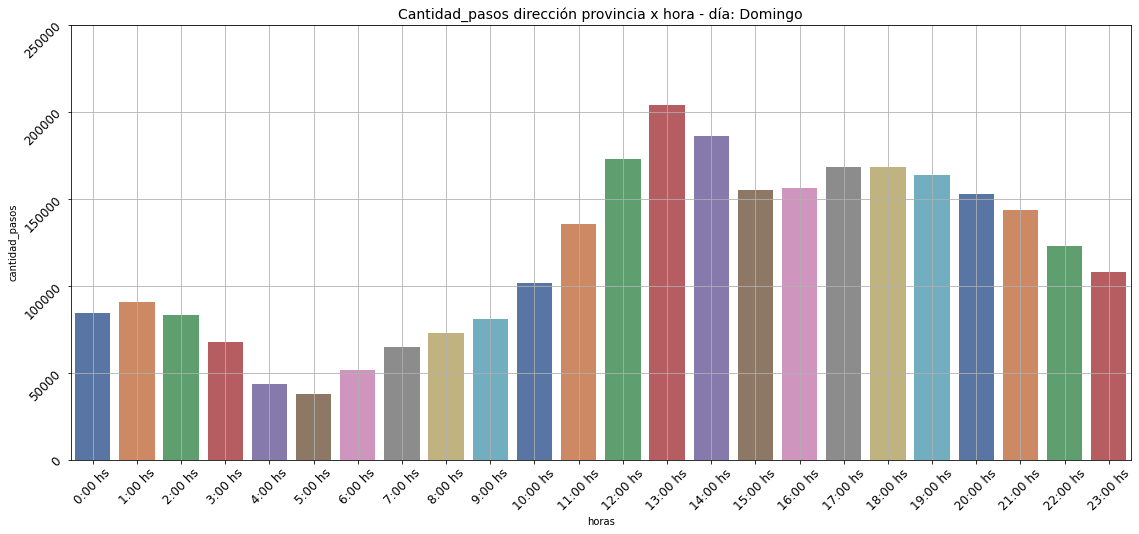

In [63]:
for dia in order_days:
    plt.figure(figsize = (19,8))
    sns.barplot(data = provincia_horas[provincia_horas['dia']== dia], x='horas', y ='cantidad_pasos', palette="deep")
    plt.title('Cantidad_pasos dirección provincia x hora - día: '+dia, fontsize = 14)
    #plt.ylabel('Cantidad de pasos x Millón', fontsize = 14)
    plt.xticks(range(24),
               [str(i) +':00 hs' for i in range(24)],
               rotation = 45,
               fontsize = 12)
    plt.yticks(range(0, 3*10**5,5*10**4),
               [str(i) for i in range(0, 3*10**5,5*10**4)],
               rotation = 45,
               fontsize = 12)
    plt.grid()

In [64]:
provincia_horas1 = provincia.pivot_table(values = 'cantidad_pasos',
                                index = ['dia','horas'], 
                                aggfunc = 'mean')
provincia_horas1 = provincia_horas1.reset_index()
provincia_horas1.head()

dia  horas  cantidad_pasos
0  Domingo      0      135.309295
1  Domingo      1      157.109375
2  Domingo      2      147.746454
3  Domingo      3      120.301786
4  Domingo      4       83.928155

In [65]:
mapa_provincia = provincia_horas1.pivot_table(values = 'cantidad_pasos', index = 'dia', columns = 'horas').loc[order_days]
mapa_provincia

horas              0           1           2           3          4   \
dia                                                                    
Lunes       96.347403  105.351211   66.030631   45.581784  40.602941   
Martes     104.127273   81.331579   50.277087   33.928309  33.276438   
Miércoles  112.196850   89.028219   54.055856   35.305054  33.182815   
Jueves     120.573016  109.641892   63.469459   39.960000  35.675373   
Viernes    143.683801  108.398058   71.467487   41.567521  38.214669   
Sábado     148.668919  144.692568  112.399323   81.545614  62.578671   
Domingo    135.309295  157.109375  147.746454  120.301786  83.928155   

horas             5          6           7           8           9   ...  \
dia                                                                  ...   
Lunes      55.820370  99.930153  172.300161  226.419971  242.256637  ...   
Martes     46.502712  86.818487  152.417404  224.052778  247.078873  ...   
Miércoles  46.755396  88.269360  160.208909  237.281831  263.759475  ...   
Jueves     46.922261  91.219224  161.031627  233.505602  260.303977  ...   
Viernes    50.534602  91.581126  158.457576  227.506207  251.651558  ...   
Sábado     70.157040  94.791461  132.068146  158.016035  180.039295  ...   
Domingo    74.314961  98.062738  112.998258  119.569079  128.426984  ...   

horas              14          15          16          17          18  \
dia                                                                     
Lunes      282.469780  289.519022  309.920162  315.408470  316.326241   
Martes     301.518156  307.431267  325.283984  328.271487  337.358060   
Miércoles  294.394667  313.615385  336.956407  329.694335  337.622222   
Jueves     302.373510  321.138381  344.607378  346.590231  348.163408   
Viernes    326.477971  344.861886  348.164948  345.062918  331.009615   
Sábado     332.935199  287.767677  266.443796  247.912732  236.829971   
Domingo    283.382622  228.602659  226.627907  245.880117  242.754690   

horas              19          20          21          22          23  
dia                                                                    
Lunes      300.243319  255.074020  220.089955  176.873476  143.575428  
Martes     314.173484  262.163090  243.432229  184.977645  143.559633  
Miércoles  316.057584  269.640580  247.374627  195.983607  152.873134  
Jueves     322.830295  279.218705  250.156573  202.065250  163.097978  
Viernes    303.903270  261.139241  258.442478  236.442219  179.681402  
Sábado     226.395080  234.300156  236.352665  218.912829  166.684380  
Domingo    238.581633  226.445104  219.865237  185.596970  162.286787  

[7 rows x 24 columns]

Text(0.5, 1.0, 'heatmap cantidad de autos promedio x hora (sentido Provincia)')

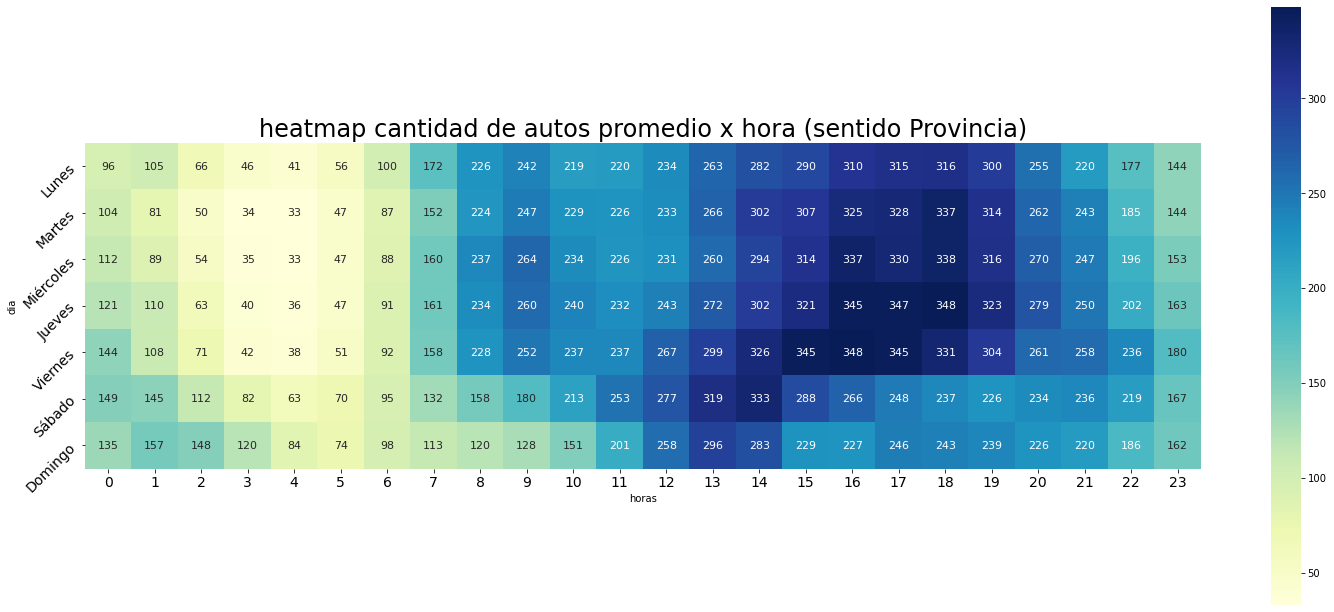

In [66]:
plt.figure(figsize = (25,11))
sns.heatmap(mapa_provincia,
           cbar = True,
           square = True, 
           annot =True,
           fmt = '.0f',
           annot_kws = {'size':11},
           cmap="YlGnBu")
plt.xticks(fontsize = 14)
plt.yticks(rotation = 45, fontsize = 14)
plt.title('heatmap cantidad de autos promedio x hora (sentido Provincia)', fontsize = 24)

In [67]:
#Luego observamos si este comportamiento diario, varia en el transcurso de los años

In [68]:
provincia['año']= provincia['fecha'].dt.year

<ipython-input-68-f3d283fd3ad8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  provincia['año']= provincia['fecha'].dt.year


In [69]:
provincia_dias_ano = provincia.pivot_table(values = 'cantidad_pasos',
                                index = 'dia',
                                columns = 'año',
                                aggfunc = 'sum')
provincia_dias_ano = provincia_dias_ano.reset_index()
provincia_dias_ano.head(7)

año        dia     2017     2018     2019
0      Domingo   991745   925608   896214
1       Jueves  1300490  1217934  1026888
2        Lunes  1177681  1097317   956770
3       Martes  1199483  1128254   991102
4    Miércoles  1270470  1176785   983673
5       Sábado  1152887  1043809   949099
6      Viernes  1359082  1253208  1059716

In [70]:
#Dividimos nuestro dataset teniendo en cuenta el comportamiento de los distintos días por año.
b = pd.melt(provincia_dias_ano,['dia'])
b['dia'] = b['dia'].astype(cat_size_order)
b.sort_values('dia', inplace = True)

/Users/feliorelo/opt/anaconda3/envs/acamicaserie/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/feliorelo/opt/anaconda3/envs/acamicaserie/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/feliorelo/opt/anaconda3/envs/acamicaserie/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an 

Text(0.5, 0, 'Sentido = Provincia')

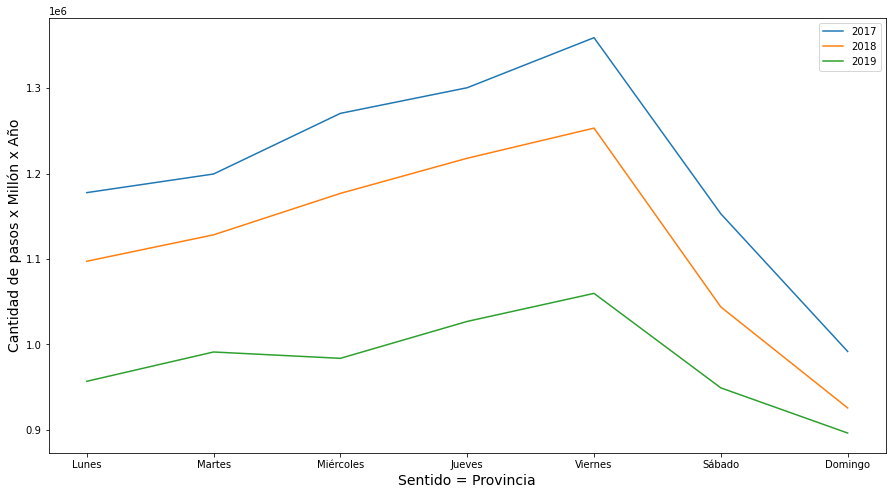

In [71]:
plt.figure(figsize = (15,8))

df_1 = b[b["año"]==2017]

df_2 = b[b["año"]==2018]

df_3 = b[b["año"]==2019]

x_col='dia'
y_col = 'value'
sns.lineplot(df_1.dia, df_1["value"], label = '2017')
sns.lineplot(df_2.dia, df_2["value"], label = '2018')
sns.lineplot(df_3.dia, df_3["value"], label = '2019')
plt.ylabel('Cantidad de pasos x Millón x Año', fontsize = 14)
plt.xlabel('Sentido = Provincia', fontsize = 14)

#Al igual que en el sentido centro vemos que existe un comportamiento similar en cuanto a los días de mayor transito de la semana,  pero observamos que año a año existe una disminución en la cantidad de los pasos.

/Users/feliorelo/opt/anaconda3/envs/acamicaserie/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/feliorelo/opt/anaconda3/envs/acamicaserie/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/feliorelo/opt/anaconda3/envs/acamicaserie/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an 

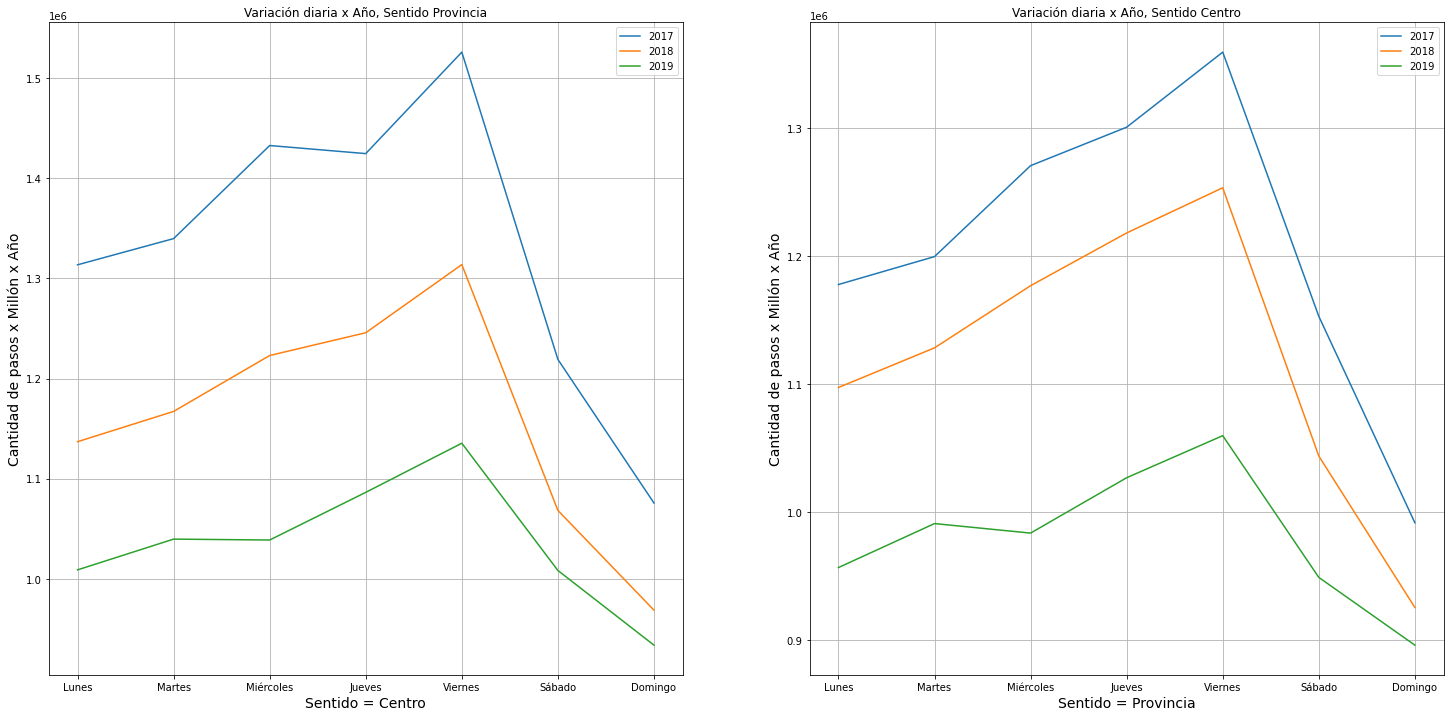

In [72]:
plt.figure(figsize = (25,12))

plt.subplot(1,2,1)

x_col='dia'
y_col = 'value'
sns.lineplot(df1.dia, df1["value"], label = '2017')
sns.lineplot(df2.dia, df2["value"], label = '2018')
sns.lineplot(df3.dia, df3["value"], label = '2019')
plt.ylabel('Cantidad de pasos x Millón x Año', fontsize = 14)
plt.xlabel('Sentido = Centro', fontsize = 14)
plt.title('Variación diaria x Año, Sentido Provincia')
plt.grid()

plt.subplot(1,2,2)
x_col='dia'
y_col = 'value'
sns.lineplot(df_1.dia, df_1["value"], label = '2017')
sns.lineplot(df_2.dia, df_2["value"], label = '2018')
sns.lineplot(df_3.dia, df_3["value"], label = '2019')
plt.ylabel('Cantidad de pasos x Millón x Año', fontsize = 14)
plt.xlabel('Sentido = Provincia', fontsize = 14)
plt.title('Variación diaria x Año, Sentido Centro')
plt.grid()

Comportamiento semanal de cada sentido, y variación anual del tráfico, observandose una disminución con el paso de los años.

/Users/feliorelo/opt/anaconda3/envs/acamicaserie/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/feliorelo/opt/anaconda3/envs/acamicaserie/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/feliorelo/opt/anaconda3/envs/acamicaserie/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an 

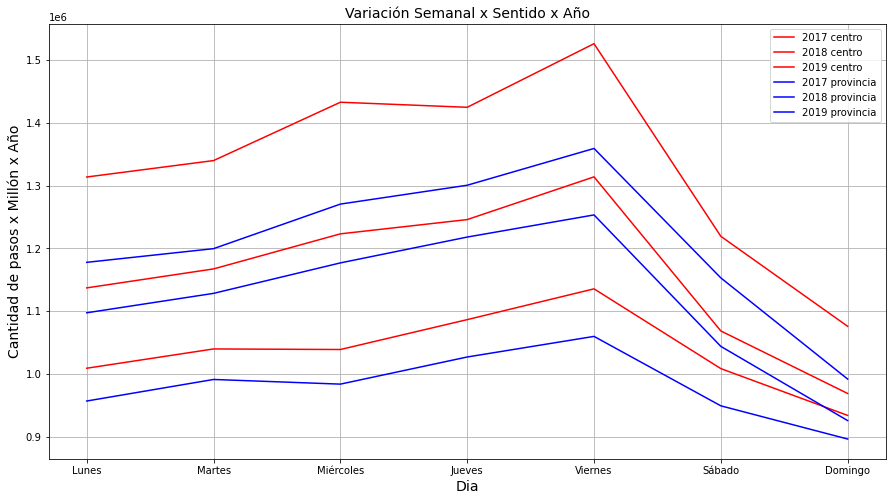

In [73]:
plt.figure(figsize = (15,8))

sns.lineplot(df1.dia, df1["value"], label = '2017 centro', color='red')
sns.lineplot(df2.dia, df2["value"], label = '2018 centro', color='red')
sns.lineplot(df3.dia, df3["value"], label = '2019 centro', color='red')
sns.lineplot(df_1.dia, df_1["value"], label = '2017 provincia', color='blue')
sns.lineplot(df_2.dia, df_2["value"], label = '2018 provincia', color='blue')
sns.lineplot(df_3.dia, df_3["value"], label = '2019 provincia', color='blue')

plt.ylabel('Cantidad de pasos x Millón x Año', fontsize = 14)
plt.xlabel('Dia', fontsize = 14)
plt.title('Variación Semanal x Sentido x Año', fontsize = 14)
plt.grid()

En esta gráfica observamos de manera mas visual el comportamiento de los distintos sentidos en los dias de la semana con el paso de los años. En rojo tenemos los años en dirección centro y en azul los de sentido provincia, a medida que vamos bajando en cada linea cambiamos de año, pasando del 2017 hacia el 2019. 
Se puede observar que existe un comportamiento similar durante la semana, pero siempre existe un porcentaje mayor de vehiculos que pasan en sentido centro. Al mismo tiempo en ambos sentidos se puede notar la disminución del tráfico año a año.

In [74]:
diario1 = diario[diario.cantidad_pasos>10000] 

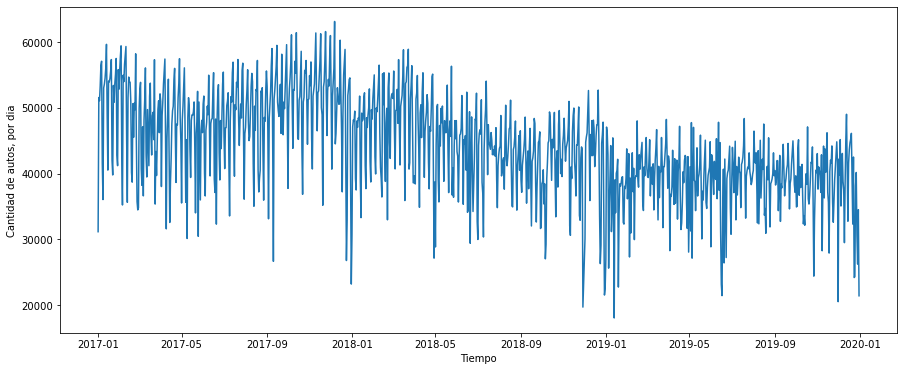

In [75]:
plt.figure(figsize = (15,6))
plt.plot(diario1.index, diario1.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por dia')
plt.show()

In [76]:
#tres años, diario. ventana creada
#Center, me pone nulos al principio y al final.
ventana = int(365*3/30)
print(ventana)
diario_promedio_tendencia = diario1.cantidad_pasos.rolling(window=ventana, center = True).mean()
diario_promedio_tendencia

36


fecha
2017-01-01   NaN
2017-01-02   NaN
2017-01-03   NaN
2017-01-04   NaN
2017-01-05   NaN
              ..
2019-12-27   NaN
2019-12-28   NaN
2019-12-29   NaN
2019-12-30   NaN
2019-12-31   NaN
Name: cantidad_pasos, Length: 1089, dtype: float64

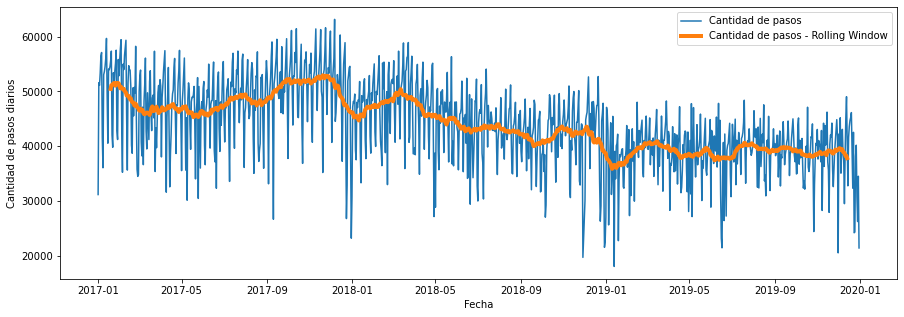

In [77]:
plt.figure(figsize = (15,5))
plt.plot(diario1.index, diario1.cantidad_pasos, label = 'Cantidad de pasos')
plt.plot(diario_promedio_tendencia, lw = 4, label = 'Cantidad de pasos - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos diarios')
plt.legend()
plt.show()

Podemos observar que la media movil para la ventana seleccionada en esta grafica, tiende a descender, es decir se observa nuevamenten la tendencia con el paso de los años a la disminución del tráfico.

### Tendencia Lineal
Para visualizar esta tendencia decreciente, lo que haremos sera ajustar una regresión lineal a la serie, además lo que  haremos fue separar nuestra serie original de la tendencia pra observar si existe alguna estacionalidad.

In [78]:
#primero pasamos nuestra fecha a numeros.
diario1['fecha_numeros']=diario1.index.map(datetime.datetime.toordinal)
diario1.head()

<ipython-input-78-78435c31e44c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diario1['fecha_numeros']=diario1.index.map(datetime.datetime.toordinal)


cantidad_pasos  fecha_numeros
fecha                                    
2017-01-01           31183         736330
2017-01-02           51568         736331
2017-01-03           51093         736332
2017-01-04           53332         736333
2017-01-05           56486         736334

In [79]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(diario1.fecha_numeros.values.reshape(-1, 1), diario1.cantidad_pasos)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

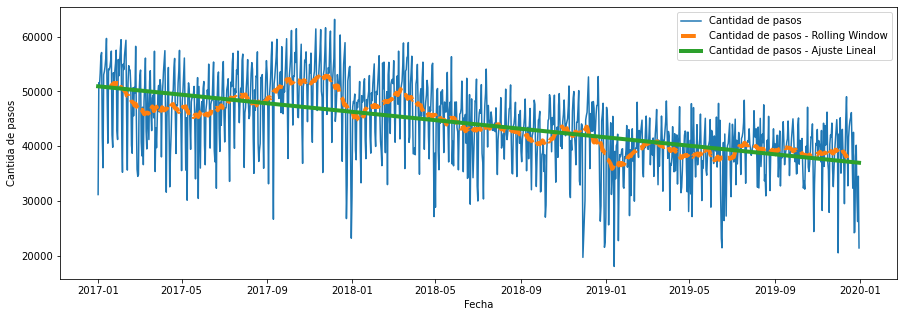

In [80]:
plt.figure(figsize = (15,5))
plt.plot(diario1.index, diario1.cantidad_pasos, label = 'Cantidad de pasos')
plt.plot(diario_promedio_tendencia, ls = '--', lw = 4, label = 'Cantidad de pasos - Rolling Window')
plt.plot(diario1.index, lr.predict(diario1.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Cantidad de pasos - Ajuste Lineal')
# plt.xlim(datetime.date(1985,1,1), datetime.date(2018,1,1))
# plt.ylim([0,30])
plt.xlabel('Fecha')
plt.ylabel('Cantida de pasos')
plt.legend()
plt.show()

#Ahora obtenemos las componentes.

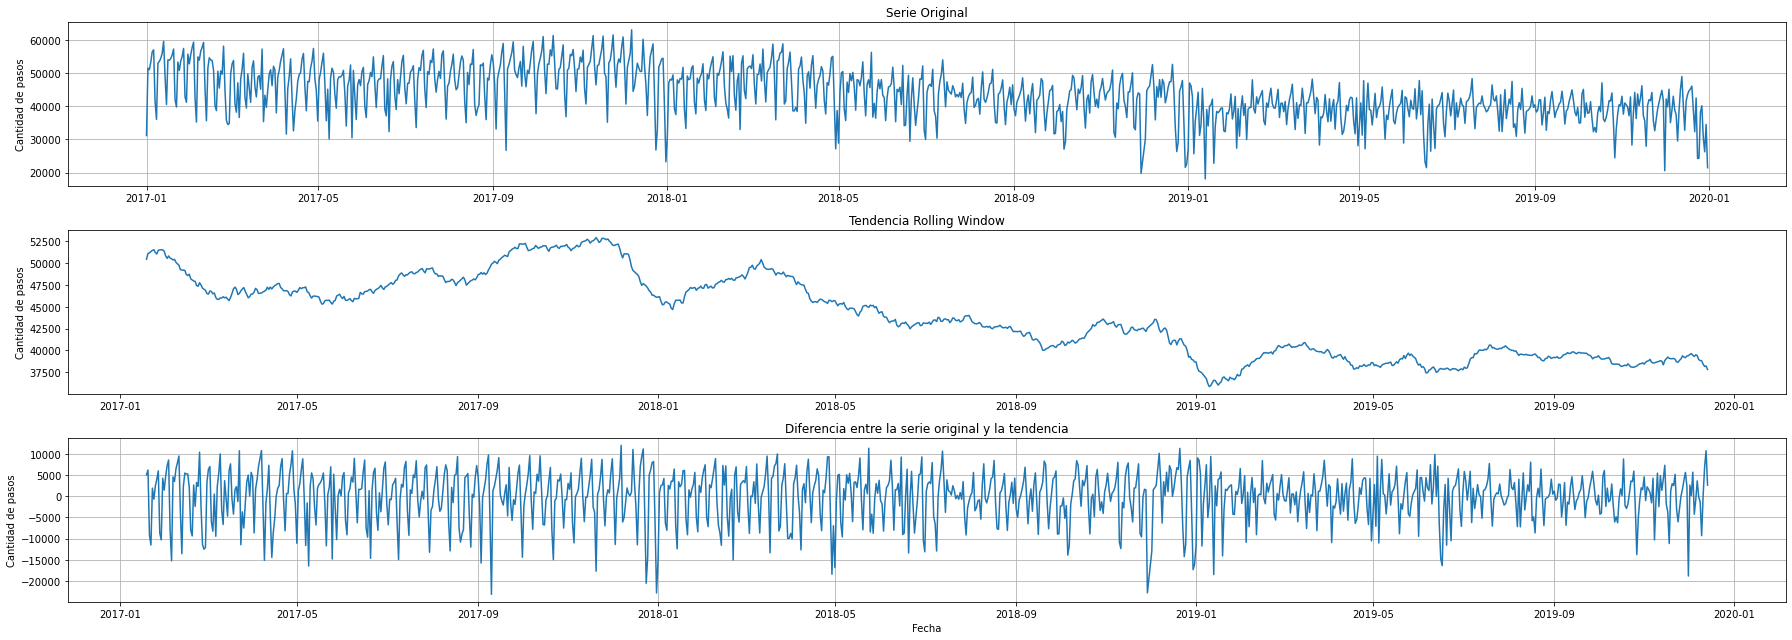

In [81]:
plt.figure(figsize = (25,9))

plt.subplot(3,1,1)
plt.title('Serie Original')
plt.plot(diario1.index, diario1.cantidad_pasos)
plt.ylabel('Cantidad de pasos')
plt.grid()

plt.subplot(3,1,2)
plt.title('Tendencia Rolling Window')
plt.plot(diario_promedio_tendencia)
plt.ylabel('Cantidad de pasos')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia')
plt.plot(diario1.index, diario1.cantidad_pasos - diario_promedio_tendencia)
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.grid()

plt.tight_layout()
plt.show()

A partir de ahora comprobaremos si esta tendencia decreciente se debe a una disminución en el tráfico o a un incremento en el uso del TELEPEAJE.

In [82]:
dataset_telepase = pd.concat([data_2019, data_2018, data_2017])

In [83]:
dataset_telepase = dataset_telepase[((dataset_telepase['forma_pago']=="TELEPASE") & (dataset_telepase['estacion']=="Illia") )]

In [84]:
dataset_telepase.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)

dataset_telepase.head()

fecha  hora_fin     dia    sentido tipo_vehiculo  cantidad_pasos
20  2019-01-01         1  Martes     Centro       Liviano              59
21  2019-01-01         1  Martes     Centro        Pesado               1
23  2019-01-01         1  Martes  Provincia       Liviano             106
25  2019-01-01         1  Martes  Provincia        Pesado               2
85  2019-01-01         2  Martes     Centro       Liviano             507

In [85]:
#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_telepase['fecha2'] = pd.to_datetime(dataset_telepase.fecha) + pd.to_timedelta(dataset_telepase.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset_telepase.drop(columns=['fecha','hora_fin'], inplace = True)

dataset_telepase.rename(columns = {'fecha2':'fecha'}, inplace = True) 

In [86]:
#Reordenamos el dataset por fecha
dataset_telepase.sort_values('fecha', inplace = True)
dataset_telepase.reset_index(drop=True, inplace = True)

In [87]:
diario_telepase = dataset_telepase.resample('D', on = 'fecha').sum()

In [88]:
diario_promedio_tendencia_te = diario_telepase.cantidad_pasos.rolling(window=ventana, center = True).mean()
diario_promedio_tendencia_te

fecha
2017-01-01   NaN
2017-01-02   NaN
2017-01-03   NaN
2017-01-04   NaN
2017-01-05   NaN
              ..
2019-12-27   NaN
2019-12-28   NaN
2019-12-29   NaN
2019-12-30   NaN
2019-12-31   NaN
Freq: D, Name: cantidad_pasos, Length: 1095, dtype: float64

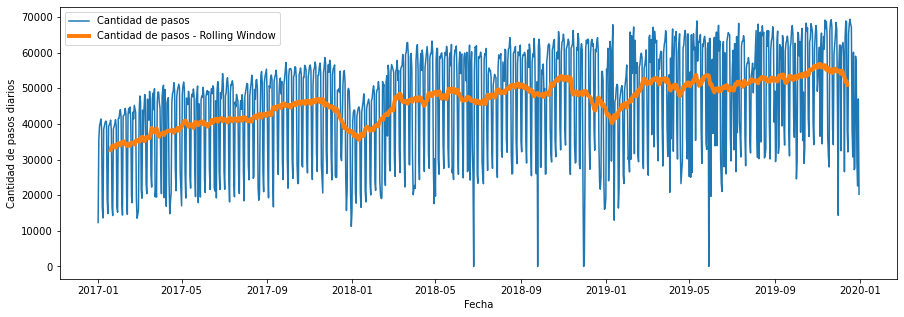

In [89]:
plt.figure(figsize = (15,5))
plt.plot(diario_telepase.index, diario_telepase.cantidad_pasos, label = 'Cantidad de pasos')
plt.plot(diario_promedio_tendencia_te, lw = 4, label = 'Cantidad de pasos - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos diarios')
plt.legend()
plt.show()

Como podemos observar la disminución se debe al cambio de método de pago, mientras disminuyen la cantidad de personas que pagan en efectivo, las personas que utilizan el telepeaje aumentan.

## Interpretación exploración de datos.

Respondiendo las preguntas planteadas con anterioridad podemos determinar lo siguiente:
    
    -Sentido Centro: 
        •Analisis diario: La exploración de los datos arrojo que el día que presenta una mayor cantidad de tráfico es el Viernes, con un promedio de 25000 pasos, y con un acumulado de 3975266millones pasos en los años bajo estudio. De forma contraria el día Domingo es el menos transitado tanto en promedio como en el acumulado total.
        •Analisis horario: Luego de realizar el barplot que permitio visualizar el acumulado del trafico por hora, concluimos que el trafico durante la semana se comporta de manera muy parecida en los distintos días de la semana. En lo días laborables, los horarios de mayor transito son los ubicados en la franja de 8 a 19hs, con un comportamiento constante de 8 a 17hs y picos maximos en los horarios de 18 a 19hs. Luego observado el promedio de pasos por hora, pudimos observar que los horarios picos estan divididos en dos franjas, la primera ubicada en la mañana de 8 a 10hs y la segunda en la franja de 18 y 19hs, cada una con un promedio de pasos mayor a 275 autos por hora.
        • Analisis interanual: Los datos observados en sentido centro siguen un comportamiento similar, en la curva no observamos variación en los horarios picos ni en los días. Aún asi se logro observar un notable decrecimiento en cuanto al tráfico en general con el paso de los años.
        
     -Sentido provincia: 
        •Analisis diario: Al igual que en sentido centro, la exploración de los datos arrojo que el día que presenta una mayor cantidad de tráfico es el Viernes, con un promedio de 23500 pasos, y con un acumulado de 3672006millones pasos en los años bajo estudio. De forma contraria el día Domingo es el menos transitado tanto en promedio como en el acumulado total.
        •Analisis horario: Luego de realizar el barplot que permitio visualizar el acumulado del trafico por hora, concluimos que el tráfico durante la semana se comporta de manera muy parecida en los distintos días de la semana. En lo días laborables, los horarios de mayor transito son los ubicados en la franja de 8 a 19hs, con un comportamiento constante de 8 a 17hs y picos maximos en los horarios de 18 a 19hs. Luego observado el promedio de pasos por hora, pudimos observar que los horarios picos estan divididos en dos franjas, la primera ubicada en la mañana de 8 a 10hs y la segunda en la franja de 18 y 19hs, cada una con un promedio de pasos mayor a 275 autos por hora.
        • Analisis interanual: Los datos observados en sentido centro siguen un comportamiento similar, en la curva no observamos variación en los horarios picos ni en los días. Aún asi se logro observar un notable decrecimiento en cuanto al tráfico en general con el paso de los años.
        
## Tendencia Decreciente:
        • Tal como pudimos observar la disminución del tráfico se debe a cambios en el método de pago. Seria interesante encontrar alguna correlación con algún otro motivo, por ejemplo: aumento en el combustible, aumento en el valor de los automoviles, disminución de salarios, etc.

# Parte B: Modelo de machine Learning

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

#Antes de comenzar, volvemos a seleccionar nuestros dataset de trabajo, nuevamente utilizaremos los dataset divididos en dirección provincia y centro.

## Sentido centro

In [90]:
centro.head(2)

dia sentido tipo_vehiculo  cantidad_pasos      fecha  horas   año
6  Domingo  Centro       Liviano              23 2017-01-01      0  2017
7  Domingo  Centro        Pesado               1 2017-01-01      0  2017

#Como vemos tenemos dos tipos de vehiculos, lo que haremos sera partir en dos para poder hacer un resampleo diario sin perder esta información, luego con un merge los volvemos a unir.

In [91]:
liviano_centro = centro[centro["tipo_vehiculo"]=="Liviano"]
pesado_centro = centro[centro["tipo_vehiculo"]=="Pesado"]

In [92]:
liviano_centro = liviano_centro.resample('D', on = 'fecha').sum()
liviano_centro.head()

cantidad_pasos  horas    año
fecha                                   
2017-01-01           16681    568  96816
2017-01-02           26011    569  98833
2017-01-03           25577    552  96816
2017-01-04           26982    552  96816
2017-01-05           28787    552  96816

### Recordemos que existen fechas con valores nulos, para eso vamos a unir el dataset centro con nuestro calendario completo, de esta manera los visualizamos y decidimos que hacer con estos.

In [93]:
calendario_centro = pd.DataFrame(pd.date_range(start='1/1/2017', end='31/12/2019')).rename(columns={0:'Date'})

In [94]:
liviano_centro.reset_index(inplace=True)

In [95]:
liviano_centro = calendario_centro.merge(liviano_centro, left_on="Date",right_on="fecha", how="left")
liviano_centro.head(1)

Date      fecha  cantidad_pasos  horas    año
0 2017-01-01 2017-01-01           16681    568  96816

In [96]:
liviano_centro.drop(['horas','año'], axis=1, inplace = True)

In [97]:
indices_centro = liviano_centro[liviano_centro['cantidad_pasos']<1000].index.tolist()

In [98]:
indices_centro

[95, 540, 632, 698, 699, 878]

In [99]:
liviano_centro.loc[indices_centro,'cantidad_pasos'] = 0

In [100]:
liviano_centro['cantidad_pasos'].replace(to_replace=0, method='ffill',inplace =True)

In [101]:
# A partir de aca ya trabajamos con los datos completos sin valores nulos.
liviano_centro.head(1)

Date      fecha  cantidad_pasos
0 2017-01-01 2017-01-01           16681

#Ahora tenemos que agregarle una columna q explique el tipo de vehiculo, para esto creamos la columnas liviano_x0 y pesado_x0

In [102]:
liviano_centro.shape

(1095, 3)

In [103]:
zeros_liviano = pd.DataFrame(np.ones((1095, 1)))
zeros_liviano.rename(columns={0: "liviano_x0"}, inplace = True)
zeros_liviano.shape

(1095, 1)

In [104]:
liviano_centro = pd.concat([liviano_centro, zeros_liviano], axis=1)
liviano_centro.head(2)

Date      fecha  cantidad_pasos  liviano_x0
0 2017-01-01 2017-01-01           16681         1.0
1 2017-01-02 2017-01-02           26011         1.0

In [105]:
liviano_centro['day_of_week'] = liviano_centro['Date'].dt.dayofweek

days = {0:'Lunes',1:'Martes',2:'Miércoles',3:'Jueves',4:'Viernes',5:'Sábado',6:'Domingo'}

liviano_centro['Date'] = liviano_centro['day_of_week'].apply(lambda x: days[x])

In [106]:
liviano_centro.head(1)

Date      fecha  cantidad_pasos  liviano_x0  day_of_week
0  Domingo 2017-01-01           16681         1.0            6

Ahora solo nos queda añadir la columna de autos pesados, asi que repetimos los pasos.

In [107]:
pesado_centro = centro[centro["tipo_vehiculo"]=="Pesado"]
pesado_centro = pesado_centro.resample('D', on = 'fecha').sum()
pesado_centro.head(2)

cantidad_pasos  horas     año
fecha                                    
2017-01-01             370   1052  159343
2017-01-02            1814   1647  278346

In [108]:
#calendario_centro = pd.DataFrame(pd.date_range(start='1/1/2017', end='31/12/2019')).rename(columns={0:'Date'})
pesado_centro.reset_index(inplace=True)

pesado_centro = calendario_centro.merge(pesado_centro, left_on="Date",right_on="fecha", how="left")
pesado_centro.head(1)

Date      fecha  cantidad_pasos  horas     año
0 2017-01-01 2017-01-01             370   1052  159343

In [109]:
pesado_centro.drop(['horas','año'], axis=1, inplace = True)

In [110]:
indices_centro_pe = pesado_centro[pesado_centro['cantidad_pasos']<30].index.tolist()
indices_centro_pe
pesado_centro.loc[indices_centro_pe,'cantidad_pasos'] = 0
pesado_centro['cantidad_pasos'].replace(to_replace=0, method='ffill',inplace =True)
# A partir de aca ya trabajamos con los datos completos sin valores nulos.
pesado_centro.head(1)

Date      fecha  cantidad_pasos
0 2017-01-01 2017-01-01             370

In [111]:
zeros_pesado = pd.DataFrame(np.ones((1095, 1)))
zeros_pesado.rename(columns={0: "pesado_x0"}, inplace = True)
zeros_pesado.shape

(1095, 1)

In [112]:
pesado_centro = pd.concat([pesado_centro, zeros_pesado], axis=1)
pesado_centro.head(2)

Date      fecha  cantidad_pasos  pesado_x0
0 2017-01-01 2017-01-01             370        1.0
1 2017-01-02 2017-01-02            1814        1.0

In [113]:
pesado_centro['day_of_week'] = pesado_centro['Date'].dt.dayofweek

days = {0:'Lunes',1:'Martes',2:'Miércoles',3:'Jueves',4:'Viernes',5:'Sábado',6:'Domingo'}

pesado_centro['Date'] = pesado_centro['day_of_week'].apply(lambda x: days[x])

In [114]:
pesado_centro.head(2)

Date      fecha  cantidad_pasos  pesado_x0  day_of_week
0  Domingo 2017-01-01             370        1.0            6
1    Lunes 2017-01-02            1814        1.0            0

In [115]:
#Ahora unimos el dataset pesado con liviano centro. 

In [116]:
pesado_centro.head(1)

Date      fecha  cantidad_pasos  pesado_x0  day_of_week
0  Domingo 2017-01-01             370        1.0            6

In [117]:
liviano_centro.head(1)

Date      fecha  cantidad_pasos  liviano_x0  day_of_week
0  Domingo 2017-01-01           16681         1.0            6

In [118]:
df1_centro = pesado_centro.append(liviano_centro, ignore_index=True)
df1_centro

Date      fecha  cantidad_pasos  pesado_x0  day_of_week  liviano_x0
0       Domingo 2017-01-01             370        1.0            6         NaN
1         Lunes 2017-01-02            1814        1.0            0         NaN
2        Martes 2017-01-03            1990        1.0            1         NaN
3     Miércoles 2017-01-04            1967        1.0            2         NaN
4        Jueves 2017-01-05            2033        1.0            3         NaN
...         ...        ...             ...        ...          ...         ...
2185    Viernes 2019-12-27           20776        NaN            4         1.0
2186     Sábado 2019-12-28           15781        NaN            5         1.0
2187    Domingo 2019-12-29           13569        NaN            6         1.0
2188      Lunes 2019-12-30           18239        NaN            0         1.0
2189     Martes 2019-12-31           10866        NaN            1         1.0

[2190 rows x 6 columns]

In [119]:
df1_centro.fillna(0,inplace=True)
df1_centro.sort_values('fecha', inplace = True)
df1_centro.reset_index(drop=True, inplace = True)
df1_centro

Date      fecha  cantidad_pasos  pesado_x0  day_of_week  liviano_x0
0     Domingo 2017-01-01             370        1.0            6         0.0
1     Domingo 2017-01-01           16681        0.0            6         1.0
2       Lunes 2017-01-02           26011        0.0            0         1.0
3       Lunes 2017-01-02            1814        1.0            0         0.0
4      Martes 2017-01-03            1990        1.0            1         0.0
...       ...        ...             ...        ...          ...         ...
2185  Domingo 2019-12-29             146        1.0            6         0.0
2186    Lunes 2019-12-30           18239        0.0            0         1.0
2187    Lunes 2019-12-30             360        1.0            0         0.0
2188   Martes 2019-12-31             109        1.0            1         0.0
2189   Martes 2019-12-31           10866        0.0            1         1.0

[2190 rows x 6 columns]

### Finalmente tenemos nuestro df1_centro con el cual podremos crear nuestros modelos. Ahora realizaremos lo mismo para obtener nuestro df1_provincia

In [120]:
provincia.head(2)

dia    sentido tipo_vehiculo  cantidad_pasos      fecha  horas   año
0  Domingo  Provincia        Pesado               1 2017-01-01      0  2017
1  Domingo  Provincia       Liviano               9 2017-01-01      0  2017

In [121]:
liviano_provincia = provincia[provincia["tipo_vehiculo"]=="Liviano"]
pesado_provincia = provincia[provincia["tipo_vehiculo"]=="Pesado"]

In [122]:
liviano_provincia = liviano_provincia.resample('D', on = 'fecha').sum()
liviano_provincia.reset_index(inplace=True)

In [123]:
calendario_provincia = pd.DataFrame(pd.date_range(start='1/1/2017', end='31/12/2019')).rename(columns={0:'Date'})

In [124]:
liviano_provincia = calendario_provincia.merge(liviano_provincia, left_on="Date",right_on="fecha", how="left")
liviano_provincia.drop(['horas','año'], axis=1, inplace = True)

In [125]:
indices_provincia = liviano_provincia[liviano_provincia['cantidad_pasos']<1000].index.tolist()
indices_provincia

[95, 540, 632, 698, 699, 878]

In [126]:
liviano_provincia.loc[indices_provincia,'cantidad_pasos'] = 0
liviano_provincia['cantidad_pasos'].replace(to_replace=0, method='ffill',inplace =True)
# A partir de aca ya trabajamos con los datos completos sin valores nulos.
liviano_provincia.head(1)

Date      fecha  cantidad_pasos
0 2017-01-01 2017-01-01           13960

#Ahora tenemos que agregarle una columna q explique el tipo de vehiculo, para esto creamos la columnas liviano_x0 y pesado_x0

In [127]:
liviano_provincia.shape

(1095, 3)

In [128]:
zeros_liviano_pro = pd.DataFrame(np.ones((1095, 1)))
zeros_liviano_pro.rename(columns={0: "liviano_x0"}, inplace = True)
liviano_provincia = pd.concat([liviano_provincia, zeros_liviano_pro], axis=1)
liviano_provincia['day_of_week'] = liviano_provincia['Date'].dt.dayofweek

days = {0:'Lunes',1:'Martes',2:'Miércoles',3:'Jueves',4:'Viernes',5:'Sábado',6:'Domingo'}

liviano_provincia['Date'] = liviano_provincia['day_of_week'].apply(lambda x: days[x])

In [129]:
liviano_provincia.head(1)

Date      fecha  cantidad_pasos  liviano_x0  day_of_week
0  Domingo 2017-01-01           13960         1.0            6

Ahora solo nos queda añadir la columna de autos pesados al sentido provincia, asi que repetimos los pasos.

In [130]:
pesado_provincia = provincia[provincia["tipo_vehiculo"]=="Pesado"]
pesado_provincia = pesado_provincia.resample('D', on = 'fecha').sum()
#calendario_provincia = pd.DataFrame(pd.date_range(start='1/1/2017', end='31/12/2019')).rename(columns={0:'Date'})
pesado_provincia.reset_index(inplace=True)
pesado_provincia = calendario_provincia.merge(pesado_provincia, left_on="Date",right_on="fecha", how="left")
pesado_provincia.drop(['horas','año'], axis=1, inplace = True)
pesado_provincia.head(1)

Date      fecha  cantidad_pasos
0 2017-01-01 2017-01-01             172

In [131]:
indices_provincia_pe = pesado_provincia[pesado_provincia['cantidad_pasos']<30].index.tolist()
indices_provincia_pe
pesado_provincia.loc[indices_provincia_pe,'cantidad_pasos'] = 0
pesado_provincia['cantidad_pasos'].replace(to_replace=0, method='ffill',inplace =True)
# A partir de aca ya trabajamos con los datos completos sin valores nulos.
pesado_provincia.head(1)

Date      fecha  cantidad_pasos
0 2017-01-01 2017-01-01             172

In [132]:
zeros_pesado_pro = pd.DataFrame(np.ones((1095, 1)))
zeros_pesado_pro.rename(columns={0: "pesado_x0"}, inplace = True)
zeros_pesado_pro.shape

(1095, 1)

In [133]:
pesado_provincia = pd.concat([pesado_provincia, zeros_pesado_pro], axis=1)
pesado_provincia['day_of_week'] = pesado_provincia['Date'].dt.dayofweek

days = {0:'Lunes',1:'Martes',2:'Miércoles',3:'Jueves',4:'Viernes',5:'Sábado',6:'Domingo'}

pesado_provincia['Date'] = pesado_provincia['day_of_week'].apply(lambda x: days[x])

In [134]:
pesado_provincia.head(2)

Date      fecha  cantidad_pasos  pesado_x0  day_of_week
0  Domingo 2017-01-01             172        1.0            6
1    Lunes 2017-01-02             775        1.0            0

#Por ultimo unimos pesado con liviano y obtenemos el dataset para provincia.

In [135]:
df1_provincia = pesado_provincia.append(liviano_provincia, ignore_index=True)
df1_provincia.fillna(0,inplace=True)
df1_provincia.sort_values('fecha', inplace = True)
df1_provincia.reset_index(drop=True, inplace = True)
df1_provincia

Date      fecha  cantidad_pasos  pesado_x0  day_of_week  liviano_x0
0     Domingo 2017-01-01             172        1.0            6         0.0
1     Domingo 2017-01-01           13960        0.0            6         1.0
2       Lunes 2017-01-02           22968        0.0            0         1.0
3       Lunes 2017-01-02             775        1.0            0         0.0
4      Martes 2017-01-03             781        1.0            1         0.0
...       ...        ...             ...        ...          ...         ...
2185  Domingo 2019-12-29             118        1.0            6         0.0
2186    Lunes 2019-12-30           15623        0.0            0         1.0
2187    Lunes 2019-12-30             301        1.0            0         0.0
2188   Martes 2019-12-31             117        1.0            1         0.0
2189   Martes 2019-12-31           10355        0.0            1         1.0

[2190 rows x 6 columns]

## A partir de este momento ya tenemos nuestro df1_centro y df1_provincia con el cual podremos crear nuestros modelos.

In [136]:
df1_provincia.rename(index=str, columns={"fecha": "ds", "cantidad_pasos": "y"}, inplace = True)
df1_centro.rename(index=str, columns={"fecha": "ds", "cantidad_pasos": "y"}, inplace = True)

## Modelo de benchmark.
Para realizar el mismo utilizaremos un modelo de Prophet, el cual compararemos con nuestro modelo final. En este caso solo armaremos un modelo para tipo de vehiculo pesado - sentido provincia, debido a que tendriamos que hacer 3 modelos más y llevaria mucho tiempo.

In [137]:
#Prophet sentido  Provincia

In [138]:
pesado_provincia_prophet = provincia[provincia["tipo_vehiculo"]=="Pesado"]
pesado_provincia_prophet = pesado_provincia_prophet.resample('D', on = 'fecha').sum()
pesado_provincia.reset_index(inplace=True)
pesado_provincia_prophet = calendario_provincia.merge(pesado_provincia_prophet, left_on="Date",right_on="fecha", how="left")
pesado_provincia_prophet.drop(['horas','año'], axis=1, inplace = True)
indices_provincia_prophet = pesado_provincia_prophet[pesado_provincia_prophet['cantidad_pasos']<30].index.tolist()
pesado_provincia_prophet.loc[indices_provincia_prophet,'cantidad_pasos'] = 0
pesado_provincia_prophet['cantidad_pasos'].replace(to_replace=0, method='ffill',inplace =True)
# A partir de aca ya trabajamos con los datos completos sin valores nulos.
pesado_provincia_prophet.head(1)

Date  cantidad_pasos
0 2017-01-01             172

In [139]:
pesado_provincia_prophet.rename(index=str, columns={"Date": "ds", "cantidad_pasos": "y"}, inplace = True)

In [140]:
pesado_provincia_prophet

ds    y
0    2017-01-01  172
1    2017-01-02  775
2    2017-01-03  781
3    2017-01-04  784
4    2017-01-05  831
...         ...  ...
1090 2019-12-27  363
1091 2019-12-28  222
1092 2019-12-29  118
1093 2019-12-30  301
1094 2019-12-31  117

[1095 rows x 2 columns]

In [141]:
#Separo mi dataset en train y test para prophet
train = pesado_provincia_prophet.iloc[0:1004]
test = pesado_provincia_prophet.iloc[1004:1095]

In [142]:
import pandas as pd
from fbprophet import Prophet
# Prophet
m_provincia = Prophet(daily_seasonality=True)
m_provincia.fit(train)

In [143]:
#Como predecimos el ultimo trimestre, establecemos como 90 días el periodo.
future = m_provincia.make_future_dataframe(periods=90)
future.tail()

ds
1089 2019-12-26
1090 2019-12-27
1091 2019-12-28
1092 2019-12-29
1093 2019-12-30

In [144]:
forecast = m_provincia.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
1089 2019-12-26  383.897918  226.625985  553.124456
1090 2019-12-27  389.266481  230.941380  551.201309
1091 2019-12-28  101.733499  -53.678612  276.463511
1092 2019-12-29  -67.755264 -225.553901   97.140490
1093 2019-12-30  222.134357   61.591352  392.631571

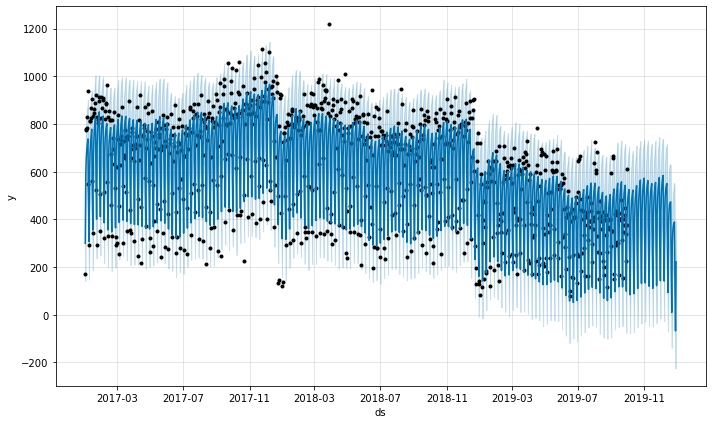

In [145]:
fig1 = m_provincia.plot(forecast)

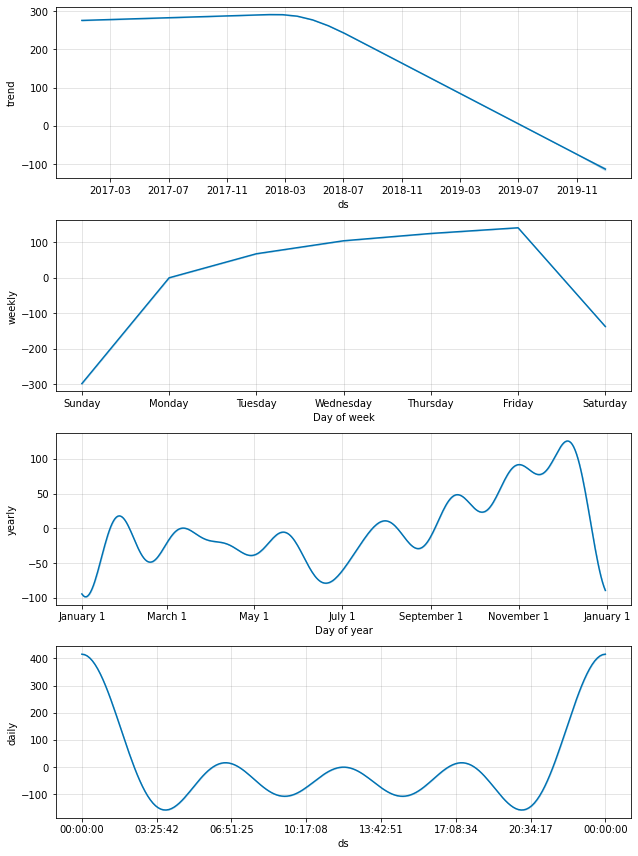

In [146]:
fig2 = m_provincia.plot_components(forecast)

In [147]:
prediccion = forecast[['ds', 'yhat']]
prediccion

ds        yhat
0    2017-01-01  299.531061
1    2017-01-02  594.612997
2    2017-01-03  660.889189
3    2017-01-04  697.327943
4    2017-01-05  719.013543
...         ...         ...
1089 2019-12-26  383.897918
1090 2019-12-27  389.266481
1091 2019-12-28  101.733499
1092 2019-12-29  -67.755264
1093 2019-12-30  222.134357

[1094 rows x 2 columns]

In [148]:
p = test[['ds','y']]
prediccion = prediccion.merge(p, left_on="ds",right_on="ds", how="left")
prediccion

ds        yhat      y
0    2017-01-01  299.531061    NaN
1    2017-01-02  594.612997    NaN
2    2017-01-03  660.889189    NaN
3    2017-01-04  697.327943    NaN
4    2017-01-05  719.013543    NaN
...         ...         ...    ...
1089 2019-12-26  383.897918  304.0
1090 2019-12-27  389.266481  363.0
1091 2019-12-28  101.733499  222.0
1092 2019-12-29  -67.755264  118.0
1093 2019-12-30  222.134357  301.0

[1094 rows x 3 columns]

In [149]:
prediccion.dropna(inplace=True)
prediccion

ds        yhat      y
1004 2019-10-02  492.684915  231.0
1005 2019-10-03  510.952230  260.0
1006 2019-10-04  524.971112  689.0
1007 2019-10-05  245.610813  688.0
1008 2019-10-06   83.747229  403.0
...         ...         ...    ...
1089 2019-12-26  383.897918  304.0
1090 2019-12-27  389.266481  363.0
1091 2019-12-28  101.733499  222.0
1092 2019-12-29  -67.755264  118.0
1093 2019-12-30  222.134357  301.0

[90 rows x 3 columns]

In [150]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mean_squared_error(prediccion.y, prediccion.yhat)

26411.510743771585

In [151]:
mean_absolute_error(prediccion.y, prediccion.yhat)

128.21162902355525

In [152]:
r2_score(prediccion.y, prediccion.yhat)

-0.3775854572175448

### El modelo que obtuvimos en benchmark obtuvo un error absoluto de 128 pasos, el mismo es un error muy grande ya que en este caso estamos tratando de predecir pasos de vehiculos pesados. A partir de estos datos veremos si mejora o no nuestro modelo

# Modelado
Nuestros dataset a modelar

df1_provincia 

df1_centro

## Data Encoding

Lo primero que haremos sera separar el dataset en train y test.
Comenzamos con el dataset de sentido provincia. Como sabemos hay q predecir el ultimo trimestre del 2019. Este trimestre ira desde el 1 de octubre al 31 de diciembre de 2019

In [153]:
df1_provincia.head()

Date         ds      y  pesado_x0  day_of_week  liviano_x0
0  Domingo 2017-01-01    172        1.0            6         0.0
1  Domingo 2017-01-01  13960        0.0            6         1.0
2    Lunes 2017-01-02  22968        0.0            0         1.0
3    Lunes 2017-01-02    775        1.0            0         0.0
4   Martes 2017-01-03    781        1.0            1         0.0

In [154]:
provincia_train = df1_provincia[df1_provincia['ds']<"2019-10-01"]

In [155]:
provincia_test = df1_provincia[df1_provincia['ds']>="2019-10-01"]

In [156]:
centro_train = df1_centro[df1_centro['ds']<"2019-10-01"]

In [157]:
centro_test = df1_centro[df1_centro['ds']>="2019-10-01"]

In [158]:
#Agregamos columnas con los años, meses y dias, para lograr un encoding.
provincia_train['Year'] = provincia_train['ds'].dt.year
provincia_train['Month'] = provincia_train['ds'].dt.month
provincia_train['Day'] = provincia_train['ds'].dt.day
##
provincia_test['Year'] = provincia_test['ds'].dt.year
provincia_test['Month'] = provincia_test['ds'].dt.month
provincia_test['Day'] = provincia_test['ds'].dt.day

centro_train['Year'] = centro_train['ds'].dt.year
centro_train['Month'] = centro_train['ds'].dt.month
centro_train['Day'] = centro_train['ds'].dt.day
##
centro_test['Year'] = centro_test['ds'].dt.year
centro_test['Month'] = centro_test['ds'].dt.month
centro_test['Day'] = centro_test['ds'].dt.day

<ipython-input-158-afa829a2a693>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  provincia_train['Year'] = provincia_train['ds'].dt.year
<ipython-input-158-afa829a2a693>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  provincia_train['Month'] = provincia_train['ds'].dt.month
<ipython-input-158-afa829a2a693>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

## MODELO SENTIDO PROVINCIA

In [159]:
provincia_train.head(3)

Date         ds      y  pesado_x0  day_of_week  liviano_x0  Year  Month  \
0  Domingo 2017-01-01    172        1.0            6         0.0  2017      1   
1  Domingo 2017-01-01  13960        0.0            6         1.0  2017      1   
2    Lunes 2017-01-02  22968        0.0            0         1.0  2017      1   

   Day  
0    1  
1    1  
2    2

In [160]:
target_column = ['y']
variable_features = ['pesado_x0', 'day_of_week', 'liviano_x0',
                      'Year', 'Month', 'Day']

In [161]:
#X e y Train.
X_provincia_train = provincia_train[variable_features]
X_centro_train = centro_train[variable_features]
####
y_provincia_train = provincia_train[target_column]
y_centro_train = centro_train[target_column]

#X e y Test.
X_provincia_test = provincia_test[variable_features]
X_centro_test = centro_test[variable_features]
####
y_provincia_test = provincia_test[target_column]
y_centro_test = centro_test[target_column]

#Ya con los datos separados y listos para trabajar, armamos nuestro primer modelo de XGBOOST, comenzamos con los datos de provincia.

In [162]:
#Comenzamos identificando la mayor profundidad de nuestro arbol para evitar un overfitting.

In [163]:
import xgboost as xg 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#Identificamos mejor la cantidad adecuada de la maxima profundidad.
# Definimos las listas vacias para los valores de accuracy deseados
lista_mae_train = []
lista_mae_test = []

# Definimos la lista de valores de k que vamos a explorar
max_depth = [1,2,3,4,5,6,7,8,9,10,15,20]

# Generamos un loop sobre los distintos valores de k 
for k in max_depth:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado para el xgboost
    xgb = xg.XGBRegressor(max_depth=k, random_state=42)
    
    # Entrenar el modelo
    xgb.fit(X_provincia_train, y_provincia_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = xgb.predict(X_provincia_train)
    train_mae = np.sqrt(mean_absolute_error(y_provincia_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = xgb.predict(X_provincia_test)
    test_mae = np.sqrt(mean_absolute_error(y_provincia_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_mae_train.append(train_mae)
    lista_mae_test.append(test_mae)

Text(0, 0.5, 'Error MAE')

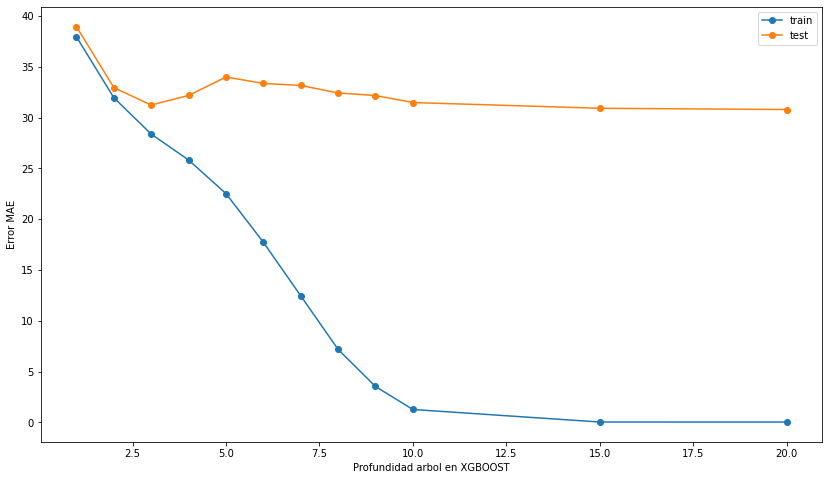

In [164]:
plt.figure(figsize=(14,8))
plt.plot(max_depth,lista_mae_train,'o-',label='train' )
plt.plot(max_depth,lista_mae_test,'o-',label='test')
plt.legend()
plt.xlabel('Profundidad arbol en XGBOOST')
plt.ylabel('Error MAE')

#Como podemos observar la profundidad con menor error se encuentra entre 3 y 4, es por eso que haremos un grid search para elegir la más adecuada

### Optimización de hiperparametros.

In [165]:
from sklearn.model_selection import GridSearchCV
import xgboost as xg 
#max_depth = 15 , objective ='reg:squarederror', n_estimators = 50, seed = 123
xgb_r = xg.XGBRegressor() 
param_grid = {  
    'learning_rate': [0.05, 0.06],
    'max_depth': [3,4],
    'gamma': [0.8],
    'reg_alpha': [22],
    'lambda': [0.1,0.4,0.7],
    
}

XGB_cv = GridSearchCV(estimator=xgb_r, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
XGB_cv.fit(X_provincia_train, y_provincia_train)
# best parameters
print(XGB_cv.best_params_); print(XGB_cv.best_score_)

{'gamma': 0.8, 'lambda': 0.1, 'learning_rate': 0.06, 'max_depth': 4, 'reg_alpha': 22}
-1156.086521748353


#Best parameters

{'gamma': 0.8, 'lambda': 0.1, 'learning_rate': 0.06, 'max_depth': 4, 'reg_alpha': 22}
-1156.086521748353

In [166]:
#evaluación del modelo en train de XGBOOST
print(f'El RMSE es: {np.sqrt(mean_squared_error(y_provincia_train, XGB_cv.predict(X_provincia_train)))}')
print(f'El MAE es: {mean_absolute_error(y_provincia_train, XGB_cv.predict(X_provincia_train))}')

El RMSE es: 1421.0502981215168
El MAE es: 755.6577988792868


In [167]:
#Luego en test de XGBOOST
print(f'El RMSE es: {np.sqrt(mean_squared_error(y_provincia_test, XGB_cv.predict(X_provincia_test)))}')
print(f'El MAE es: {mean_absolute_error(y_provincia_test, XGB_cv.predict(X_provincia_test))}')

El RMSE es: 1609.8180343870508
El MAE es: 877.5913490834444


In [168]:
#Comparamos con un arbol de decisión para ver cual es el modelo mas adecuado.

In [169]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#Identificamos mejor la cantidad adecuada de la maxima profundidad.
# Definimos las listas vacias para los valores de accuracy deseados
lista_mae_train = []
lista_mae_test = []

# Definimos la lista de valores de k que vamos a explorar
max_depth = [1,2,3,4,5,6,7,8,9,10,15,20]

# Generamos un loop sobre los distintos valores de k 
for k in max_depth:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    tree = DecisionTreeRegressor(max_depth=k, random_state=42)
    
    # Entrenar el modelo
    tree.fit(X_provincia_train, y_provincia_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = tree.predict(X_provincia_train)
    train_mae = np.sqrt(mean_absolute_error(y_provincia_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = tree.predict(X_provincia_test)
    test_mae = np.sqrt(mean_absolute_error(y_provincia_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_mae_train.append(train_mae)
    lista_mae_test.append(test_mae)

Text(0, 0.5, 'Error MAE')

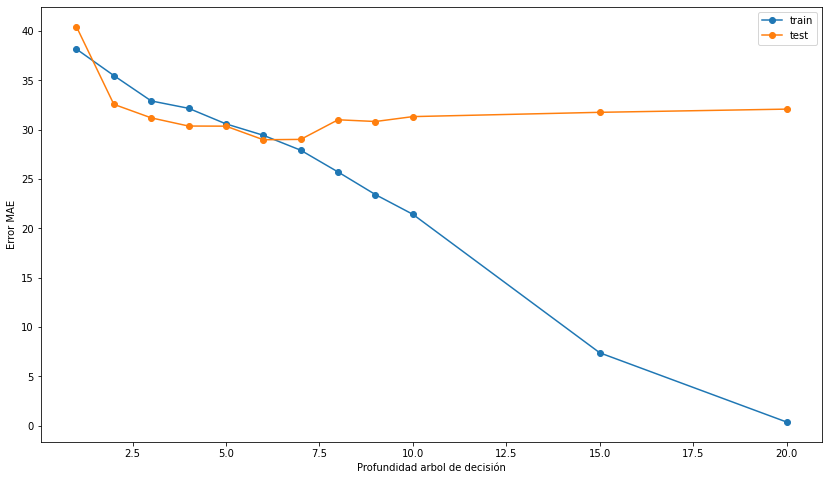

In [170]:
plt.figure(figsize=(14,8))
plt.plot(max_depth,lista_mae_train,'o-',label='train' )
plt.plot(max_depth,lista_mae_test,'o-',label='test')
plt.legend()
plt.xlabel('Profundidad arbol de decisión')
plt.ylabel('Error MAE')

In [171]:
# Definir el modelo con el valor de vecinos deseado
tree = DecisionTreeRegressor(max_depth=7, random_state=42)
    
# Entrenar el modelo
tree.fit(X_provincia_train, y_provincia_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [172]:
#evaluación del modelo en train de XGBOOST
print(f'El RMSE es: {np.sqrt(mean_squared_error(y_provincia_train, tree.predict(X_provincia_train)))}')
print(f'El MAE es: {mean_absolute_error(y_provincia_train, tree.predict(X_provincia_train))}')

El RMSE es: 1476.8204218080125
El MAE es: 779.8795047392024


In [173]:
#Luego en test de XGBOOST
print(f'El RMSE es: {np.sqrt(mean_squared_error(y_provincia_test, tree.predict(X_provincia_test)))}')
print(f'El MAE es: {mean_absolute_error(y_provincia_test, tree.predict(X_provincia_test))}')

El RMSE es: 1662.0733916433803
El MAE es: 842.4129717203087


In [174]:
#Evaluamos la distribución del error

In [175]:
prediccion_xgb = XGB_cv.predict(X_provincia_test)

In [176]:
df_prediccion_xgb = pd.DataFrame(prediccion_xgb,columns=['y'])

In [241]:
X_provincia_train.shape

(2006, 6)

In [177]:
prediction_train = XGB_cv.predict(X_provincia_train)
prediction_train = prediction_train.reshape(2006,1)
prediction_test = XGB_cv.predict(X_provincia_test)
prediction_test = prediction_test.reshape(184,1)

/Users/feliorelo/opt/anaconda3/envs/acamicaserie/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/feliorelo/opt/anaconda3/envs/acamicaserie/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'y_pred (test)')

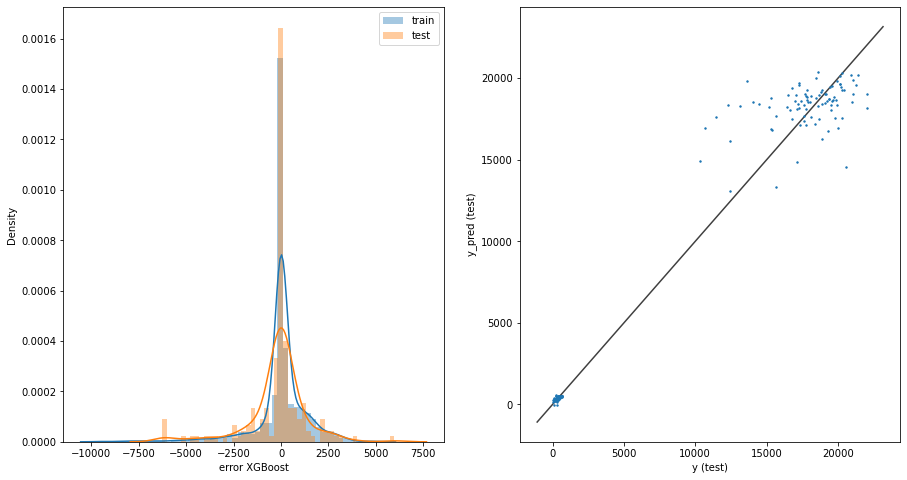

In [178]:
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
sns.distplot(y_provincia_train - prediction_train, label = 'train')
sns.distplot(y_provincia_test - prediction_test, label = 'test')
plt.xlabel('error XGBoost')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_provincia_test,prediction_test, s =2)
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

En la gráfica podemos observar la distribución del error en nuestro modelo obtenido, se puede observar dos clusters muy marcadaso en nuestros datos, esto se debe al tipo de vehiculos, en el aso de los vehiculos pesados podemos ver que el error obtenido es muy bajo, es decir nuestro modelo se desempeño muy bien, en el caso de los vehiculos livinos, existen algunos datos que estan muy alejados de nuestro error verdadero, de igual manera se comporto de manera aceptable el modelo para estos vehiculos.
A continuación observaremos la diferencia en la predicción de ambos tipos de vehiculos. 

#### Para poder visualizar de manera más ordenada separaraemos las predicciones en tipo de vehiculos, ya que la cantidad de vehiculos pesados por día es mucho menor a la de vehiculos livianos.

In [179]:
vehiculos_pesados_p = df_prediccion_xgb[df_prediccion_xgb['y']<4000]
vehiculos_pesados_p.reset_index(inplace=True)
vehiculos_livianos_p = df_prediccion_xgb[df_prediccion_xgb['y']>4000]
vehiculos_livianos_p.reset_index(inplace=True)

In [180]:
vehiculos_pesados_protest = y_provincia_test[y_provincia_test['y']<4000]
vehiculos_pesados_protest.reset_index(inplace=True)
vehiculos_livianos_protest = y_provincia_test[y_provincia_test['y']>4000]
vehiculos_livianos_protest.reset_index(inplace=True)

In [181]:
calendario_prediccion = pd.DataFrame(pd.date_range(start="2019-10-01", end="2019-12-30")).rename(columns={0:'Date'})

In [182]:
predic_fecha_pesado = vehiculos_pesados_p.assign(Date=calendario_prediccion.Date)
predic_fecha_pesado['fecha2'] = pd.to_datetime(predic_fecha_pesado.Date)
predic_fecha_pesado.set_index('fecha2',inplace=True)

test_fecha_pesado = vehiculos_pesados_protest.assign(Date=calendario_prediccion.Date)
test_fecha_pesado['fecha2'] = pd.to_datetime(test_fecha_pesado.Date)
test_fecha_pesado.set_index('fecha2',inplace=True)

<ipython-input-183-85b3de0e2d3c>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(predic_fecha_pesado.iloc[::freq].index)


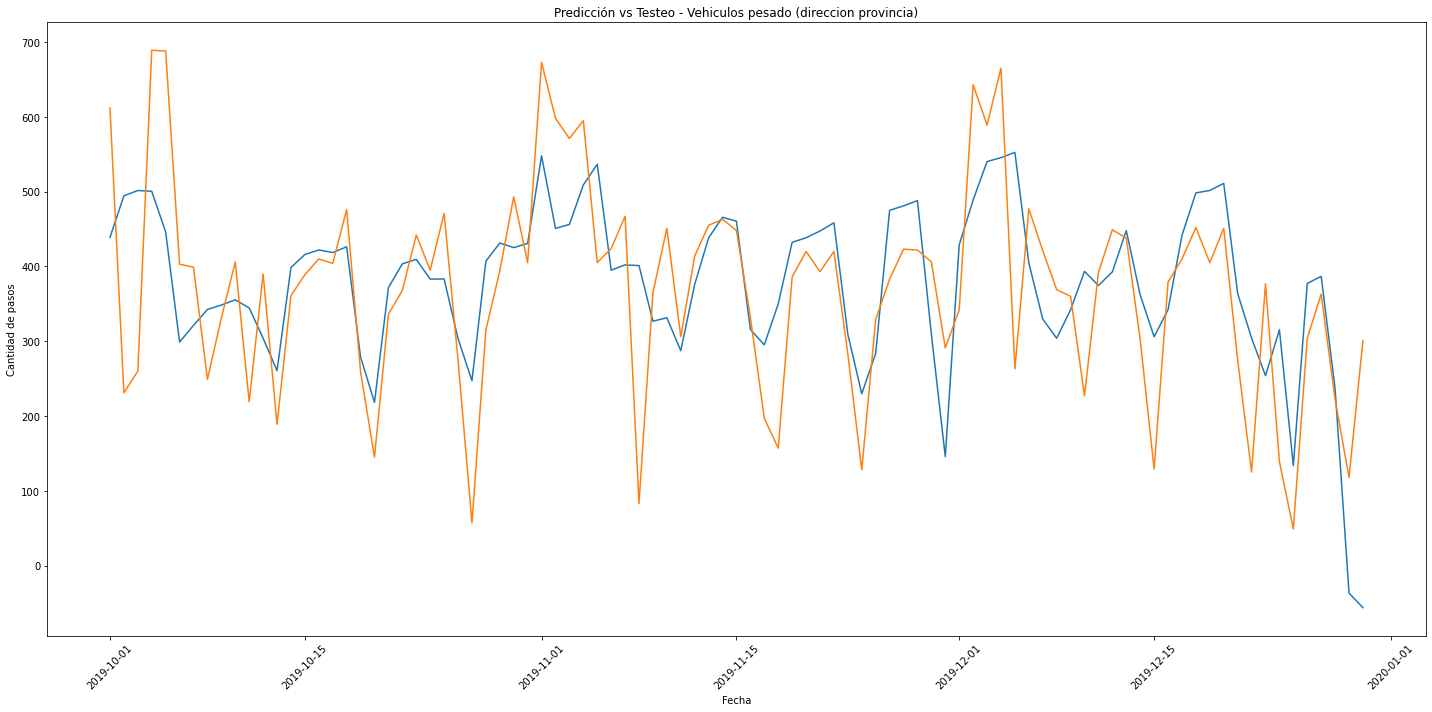

In [183]:
import matplotlib.dates as mdates
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.lineplot(x=predic_fecha_pesado.index, y='y', data=predic_fecha_pesado, ax = ax)
ax = sns.lineplot(x=predic_fecha_pesado.index, y='y', data=test_fecha_pesado, ax = ax)

ax.set_facecolor('white')
freq = int(1)
ax.set_xticklabels(predic_fecha_pesado.iloc[::freq].index)
xtix = ax.get_xticks()
ax.set_xticks(xtix[::freq])

format_ymd = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(format_ymd)
plt.xticks(rotation=45)

plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.title('Predicción vs Testeo - Vehiculos pesado (direccion provincia)')
plt.tight_layout()
plt.show()

Vemos en la gráfica la curva de predicción vs la curva de los datos reales. Como podemos obervar el modelo se comporto de manera correcta, predijo los datos con un error aceptable.

Ahora visualizamos la predicción de los vehiculos livianos y vemos como se comportaron vs los datos reales.

In [184]:
predic_fecha = vehiculos_livianos_p.assign(Date=calendario_prediccion.Date)
predic_fecha['fecha2'] = pd.to_datetime(predic_fecha.Date)

test_fecha = vehiculos_livianos_protest.assign(Date=calendario_prediccion.Date)
test_fecha['fecha2'] = pd.to_datetime(test_fecha.Date)

In [185]:
predic_fecha.set_index('fecha2',inplace=True)

<ipython-input-186-bfcdae67b869>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(predic_fecha.iloc[::freq].index)


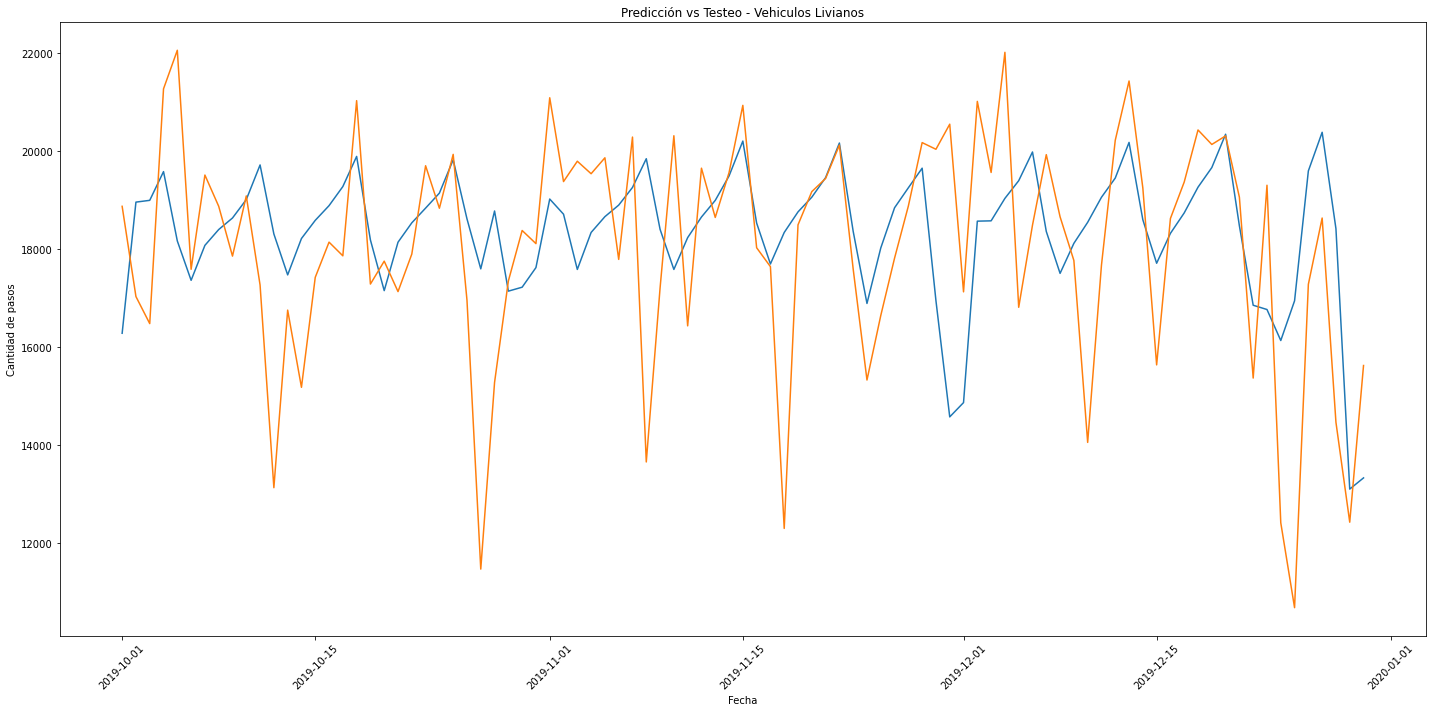

In [186]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.lineplot(x=predic_fecha.index, y='y', data=predic_fecha, ax = ax)
ax = sns.lineplot(x=predic_fecha.index, y='y', data=test_fecha, ax = ax)

ax.set_facecolor('white')
freq = int(1)
ax.set_xticklabels(predic_fecha.iloc[::freq].index)
xtix = ax.get_xticks()
ax.set_xticks(xtix[::freq])

format_ymd = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(format_ymd)
plt.xticks(rotation=45)

plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.title('Predicción vs Testeo - Vehiculos Livianos')
plt.tight_layout()
plt.show()

Vemos en la gráfica la curva de predicción vs la curva de los datos reales. Como podemos obervar el modelo se comporto de manera correcta, en este caso con los vehiculos livianos el modelo tuvo errores mayores en los casos atípicos y le costo mas devolver un resultado correcto.

## MODELO SENTIDO Centro

In [187]:
#Identificamos mejor la cantidad adecuada de la maxima profundidad.
# Definimos las listas vacias para los valores de accuracy deseados
lista_mae_train = []
lista_mae_test = []

# Definimos la lista de valores de k que vamos a explorar
max_depth = [1,2,3,4,5,6,7,8,9,10,15,20]

# Generamos un loop sobre los distintos valores de k 
for k in max_depth:
    
    # Vamos a repetir el siguiente bloque de código
    
    # Definir el modelo con el valor de vecinos deseado
    tree_c = DecisionTreeRegressor(max_depth=k, random_state=42)
    
    # Entrenar el modelo
    tree_c.fit(X_centro_train, y_centro_train)
    
    # Predecir y evaluar sobre el set de entrenamiento
    y_train_pred = tree_c.predict(X_centro_train)
    train_mae = np.sqrt(mean_absolute_error(y_centro_train, y_train_pred))
    
    # Predecir y evaluar sobre el set de evaluación
    y_test_pred = tree_c.predict(X_centro_test)
    test_mae = np.sqrt(mean_absolute_error(y_centro_test, y_test_pred))
    
    # Agregar la información a las listas
    lista_mae_train.append(train_mae)
    lista_mae_test.append(test_mae)

Text(0, 0.5, 'Error MAE')

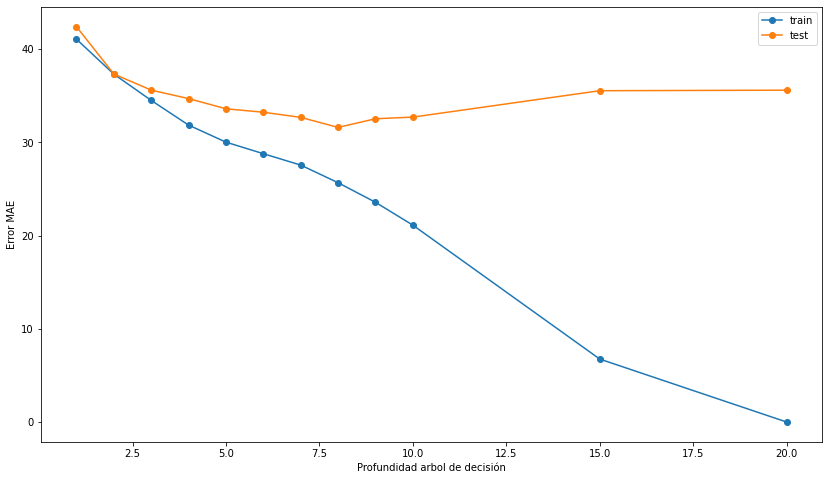

In [188]:
plt.figure(figsize=(14,8))
plt.plot(max_depth,lista_mae_train,'o-',label='train' )
plt.plot(max_depth,lista_mae_test,'o-',label='test')
plt.legend()
plt.xlabel('Profundidad arbol de decisión')
plt.ylabel('Error MAE')

In [189]:
# Definir el modelo con el valor de arboles mas adecuado
tree_c = DecisionTreeRegressor(max_depth=8, random_state=42)
    
# Entrenar el modelo
tree_c.fit(X_centro_train, y_centro_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=8,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [190]:
#evaluación del modelo en train de arbol de decision
print(f'El RMSE es: {np.sqrt(mean_squared_error(y_centro_train, tree_c.predict(X_centro_train)))}')
print(f'El MAE es: {mean_absolute_error(y_centro_train, tree_c.predict(X_centro_train))}')

El RMSE es: 1240.9449818319288
El MAE es: 659.1417432547937


In [191]:
#Luego en test de arbol de decision
print(f'El RMSE es: {np.sqrt(mean_squared_error(y_centro_test, tree_c.predict(X_centro_test)))}')
print(f'El MAE es: {mean_absolute_error(y_centro_test, tree_c.predict(X_centro_test))}')

El RMSE es: 2122.3009128832437
El MAE es: 999.0978137768927


In [192]:
#Evaluamos la distribución del error

In [193]:
prediccion_tree_centro = tree_c.predict(X_centro_test)

In [194]:
df_prediccion_tree_centro = pd.DataFrame(prediccion_tree_centro,columns=['y'])

In [195]:
X_centro_train.shape

(2006, 6)

In [196]:
prediction_train_centro = tree_c.predict(X_centro_train)
prediction_train_centro = prediction_train_centro.reshape(2006,1)
prediction_test_centro = tree_c.predict(X_centro_test)
prediction_test_centro = prediction_test_centro.reshape(184,1)

/Users/feliorelo/opt/anaconda3/envs/acamicaserie/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/feliorelo/opt/anaconda3/envs/acamicaserie/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'y_pred (test)')

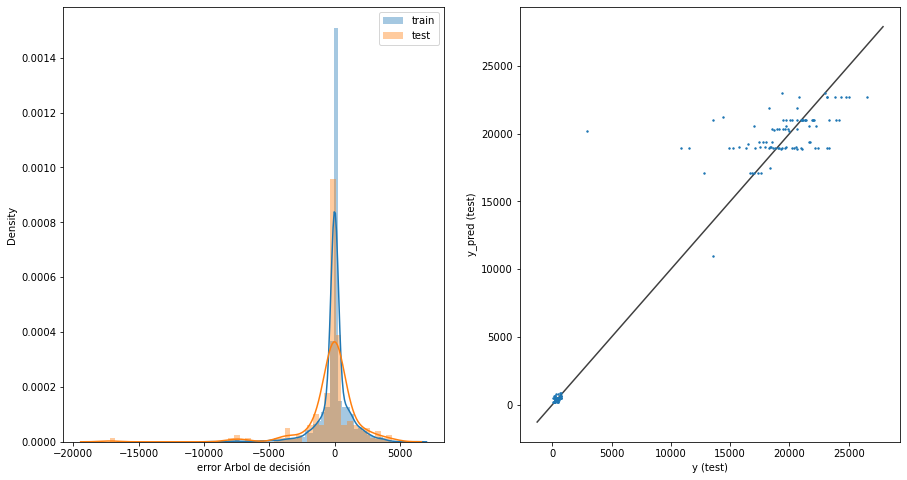

In [197]:
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
sns.distplot(y_centro_train - prediction_train_centro, label = 'train')
sns.distplot(y_centro_test - prediction_test_centro, label = 'test')
plt.xlabel('error Arbol de decisión')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_centro_test,prediction_test_centro, s =2)
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

En la gráfica podemos observar la distribución del error en nuestro modelo obtenido, se puede observar dos clusters muy marcados en nuestros datos, esto se debe al tipo de vehiculos, en la zona inferior el cluster de los vehiculos pesados podemos ver que el error obtenido es muy bajo, es decir nuestro modelo se desempeño muy bien, en el caso de los vehiculos livianos, existen algunos datos que estan muy alejados de nuestro error verdadero, de igual manera se comporto de manera aceptable el modelo para estos vehiculos.
A continuación observaremos la diferencia en la predicción de ambos tipos de vehiculos. 

#### Para poder visualizar de manera más ordenada separaraemos las predicciones en tipo de vehiculos, ya que la cantidad de vehiculos pesados por día es mucho menor a la de vehiculos livianos.

In [198]:
vehiculos_pesados_c = df_prediccion_tree_centro[df_prediccion_tree_centro['y']<4000]
vehiculos_pesados_c.reset_index(inplace=True)
vehiculos_livianos_c = df_prediccion_tree_centro[df_prediccion_tree_centro['y']>4000]
vehiculos_livianos_c.reset_index(inplace=True)

<AxesSubplot:xlabel='y', ylabel='Count'>

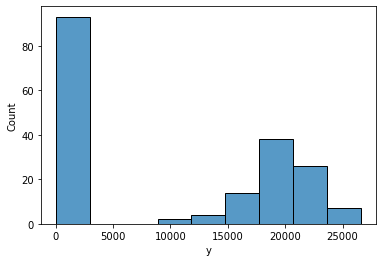

In [199]:
sns.histplot(data=y_centro_test, x="y")

En el histograma podemos ver de manera muy marcada en donde se encuentran cada tipo de vehiculo.

In [200]:
vehiculos_pesados_ctest = y_centro_test[y_centro_test['y']<2500]
vehiculos_pesados_ctest.reset_index(inplace=True)
vehiculos_livianos_ctest = y_centro_test[y_centro_test['y']>=2500]
vehiculos_livianos_ctest.reset_index(inplace=True)

In [201]:
predic_fecha_pesado_c = vehiculos_pesados_c.assign(Date=calendario_prediccion.Date)
predic_fecha_pesado_c['fecha2'] = pd.to_datetime(predic_fecha_pesado_c.Date)
predic_fecha_pesado_c.set_index('fecha2',inplace=True)

test_fecha_pesado_c = vehiculos_pesados_ctest.assign(Date=calendario_prediccion.Date)
test_fecha_pesado_c['fecha2'] = pd.to_datetime(test_fecha_pesado_c.Date)
test_fecha_pesado_c.set_index('fecha2',inplace=True)

In [202]:
#predic_fecha_pesado_c.drop(predic_fecha_pesado_c.tail(1).index,inplace=True)

In [203]:
#test_fecha_pesado_c.drop(test_fecha_pesado_c.tail(2).index,inplace=True)

In [204]:
test_fecha_pesado_c[test_fecha_pesado_c['y']<0]

Empty DataFrame
Columns: [index, y, Date]
Index: []

<ipython-input-205-f74300689056>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(predic_fecha_pesado_c.iloc[::freq].index)


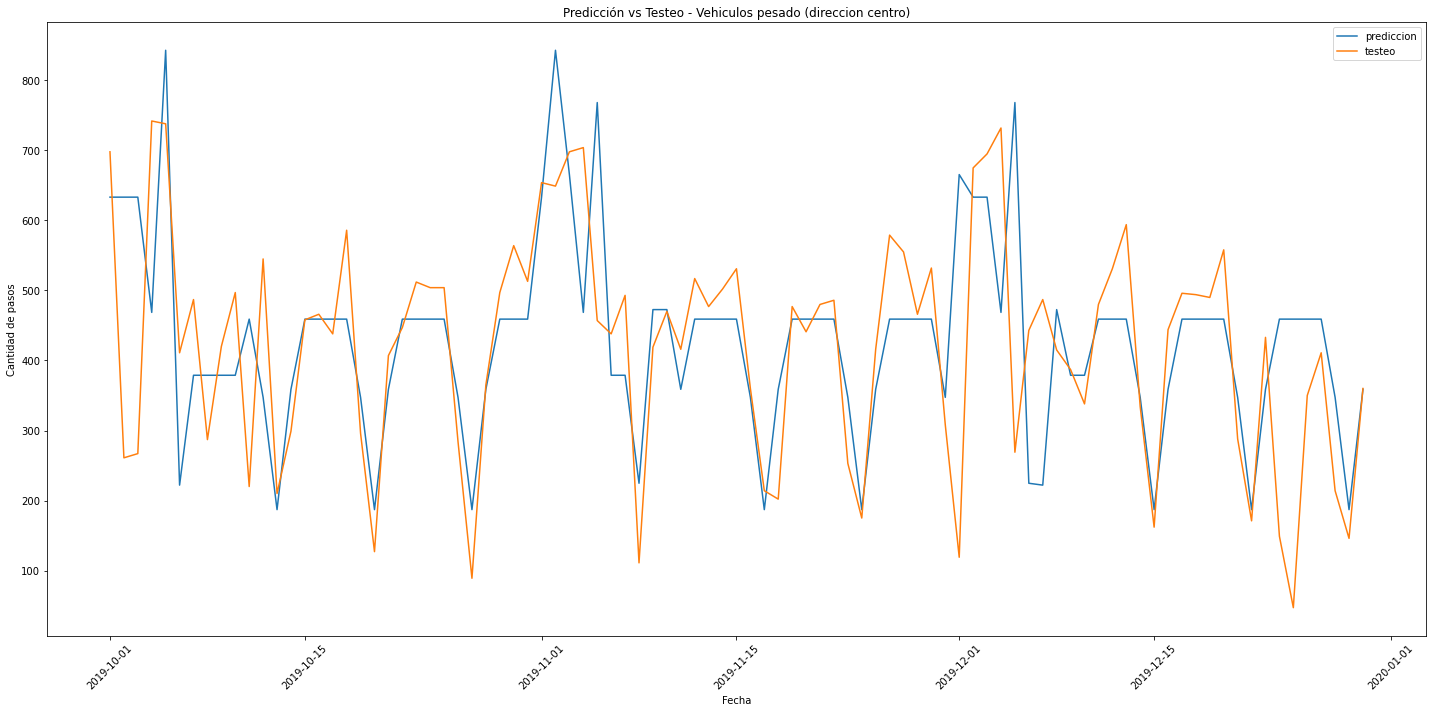

In [205]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.lineplot(x=predic_fecha_pesado_c.index, y='y', data=predic_fecha_pesado_c, ax = ax,label='prediccion')
ax = sns.lineplot(x=predic_fecha_pesado_c.index, y='y', data=test_fecha_pesado_c, ax = ax, label='testeo')

ax.set_facecolor('white')
freq = int(1)
ax.set_xticklabels(predic_fecha_pesado_c.iloc[::freq].index)
xtix = ax.get_xticks()
ax.set_xticks(xtix[::freq])

format_ymd = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(format_ymd)
plt.xticks(rotation=45)

plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.title('Predicción vs Testeo - Vehiculos pesado (direccion centro)')
plt.tight_layout()
plt.show()

Vemos en la gráfica la curva de predicción vs la curva de los datos reales. Como podemos obervar el modelo se comporto de manera correcta, predijo los datos con un error aceptable.

Ahora visualizamos la predicción de los vehiculos livianos y vemos como se comportaron vs los datos reales.

In [206]:
predic_fecha_c = vehiculos_livianos_c.assign(Date=calendario_prediccion.Date)
predic_fecha_c['fecha2'] = pd.to_datetime(predic_fecha_c.Date)

test_fecha_c = vehiculos_livianos_ctest.assign(Date=calendario_prediccion.Date)
test_fecha_c['fecha2'] = pd.to_datetime(test_fecha_c.Date)

In [207]:
predic_fecha_c.set_index('fecha2',inplace=True)

<ipython-input-208-cd90f8e1b11d>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(predic_fecha_c.iloc[::freq].index)


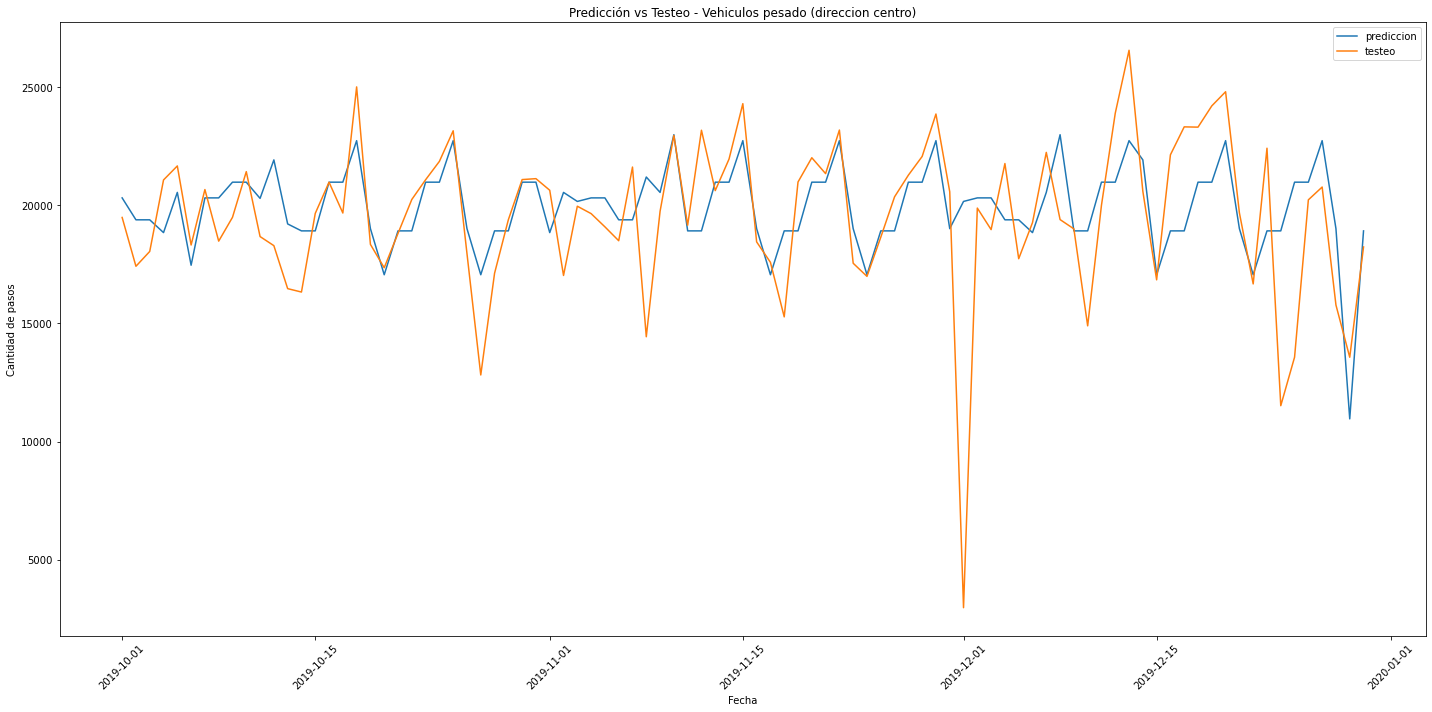

In [208]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.lineplot(x=predic_fecha_c.index, y='y', data=predic_fecha_c, ax = ax,label='prediccion')
ax = sns.lineplot(x=predic_fecha_c.index, y='y', data=test_fecha_c, ax = ax,label='testeo')

ax.set_facecolor('white')
freq = int(1)
ax.set_xticklabels(predic_fecha_c.iloc[::freq].index)
xtix = ax.get_xticks()
ax.set_xticks(xtix[::freq])

format_ymd = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(format_ymd)
plt.xticks(rotation=45)

plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Cantidad de pasos')
plt.title('Predicción vs Testeo - Vehiculos pesado (direccion centro)')

plt.tight_layout()
plt.show()

Vemos en la gráfica la curva de predicción vs la curva de los datos reales. Como podemos obervar el modelo se comporto de manera correcta, predijo los datos con un error aceptable.

## Features importance

En este paso vamos a evaluar los features más importantes para nuestros modelos, en el caso del sentido provincia seleccionamos un modelo de XGBoost y en el caso de dirección centro seleccionamos un arbol de decisión.

Modelos "name" : 
-tree_c
-XGB_cv

In [209]:
from sklearn.inspection import permutation_importance

In [210]:
results = permutation_importance(tree_c, X_centro_test, y_centro_test, n_repeats = 10, scoring = 'neg_mean_absolute_error', n_jobs = -1, random_state = 123)

In [211]:
importance = results.importances_mean / results.importances_mean.sum()

In [212]:
df_feat_importance = pd.Series(data = importance, name = 'Feature_importance', index = X_centro_test.columns).reset_index()
df_feat_importance = df_feat_importance.rename(columns = {'index':'Feature'})
df_feat_importance = df_feat_importance.sort_values('Feature_importance', ascending = False)

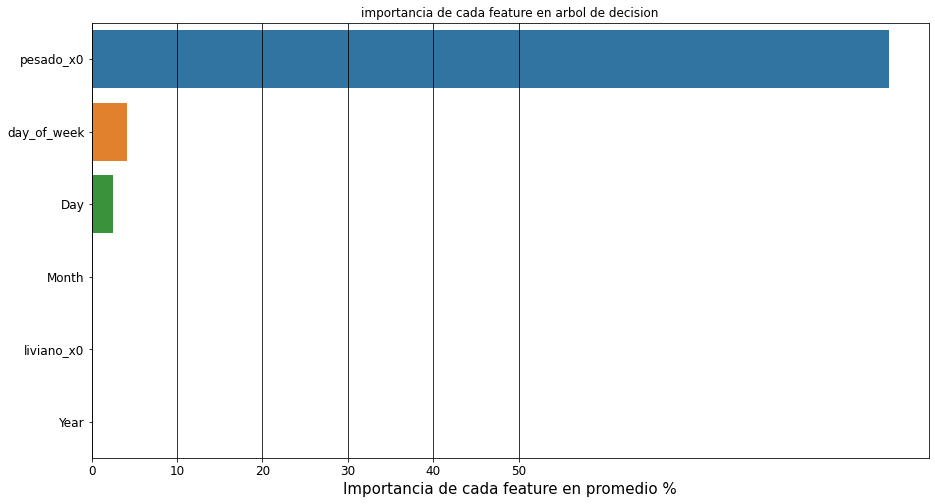

In [213]:
#Graficamos
plt.figure(figsize = (15,8))
sns.barplot(data = df_feat_importance, x = 'Feature_importance', y = 'Feature')
plt.xlabel('Importancia de cada feature en promedio %', fontsize = 15)
plt.ylabel('')
plt.title('importancia de cada feature en arbol de decision')
plt.yticks(fontsize = 12)
plt.xticks(np.arange(0,6,1)/10, [str(i) for i in range(0,60,10)], fontsize =12)
plt.grid(axis = 'x', color = 'k')

Como podemos observar el modelo le asigno una mayor importancia al tipo de vehiculo, tendriamos que fijarnos si es conveniente o no realizar un modelo para cada tipo de vehiculo para que le de mas importancia a los demas features.

In [214]:
import shap
from sklearn.inspection import permutation_importance

Para poder evaluar el modelo de XGB, primero necesito cargar el modelo nuevamente con los parametros, debido a que no puedo evaluar directamente el modelo obtenido con cross validation en el grid search.

In [215]:
xgb_r = xg.XGBRegressor(learning_rate=0.06, max_depth= 4, gamma = 0.8, reg_lambda = 0.1, reg_alpha = 22)

In [216]:
xgb_r.fit(X_provincia_train, y_provincia_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.8, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.06, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=22,
             reg_lambda=0.1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [217]:
xgb_r.feature_importances_

array([9.8704171e-01, 4.3852497e-03, 0.0000000e+00, 6.1627552e-03,
       1.5120098e-03, 8.9834823e-04], dtype=float32)

<BarContainer object of 6 artists>

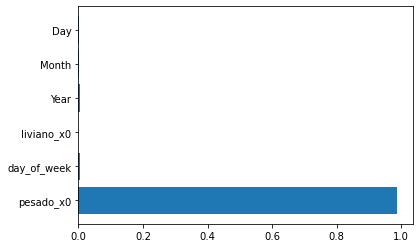

In [218]:
plt.barh(X_centro_test.columns, xgb_r.feature_importances_)

# Predicción año 2020

Para realizar la predicción utilizaremos el modelo de prophet. La misma sera realizada para la cantidad de pasos en general.
Al igual que en el modelo de benchmarking predeciremos solo los vehiculos pesados solo en sentido provincia.

In [219]:
data_2020 = pd.read_csv('/Users/feliorelo/Documents/ACAMICA 2020/Sprint 3/proyecto/flujo-vehicular-2020.csv', sep =',')

In [220]:
a_2020 = m_provincia.make_future_dataframe(periods=90 + 367)

In [221]:
#a_2020 = a_2020.loc[1095:1460]
#a_2020

In [222]:
forecast1 = m_provincia.predict(a_2020)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
1456 2020-12-27 -294.736327 -465.419291 -121.691134
1457 2020-12-28   -6.144143 -182.251352  162.745238
1458 2020-12-29   53.406923 -116.345078  213.563965
1459 2020-12-30   82.983992  -97.972871  258.865062
1460 2020-12-31   97.772457  -71.894257  277.676973

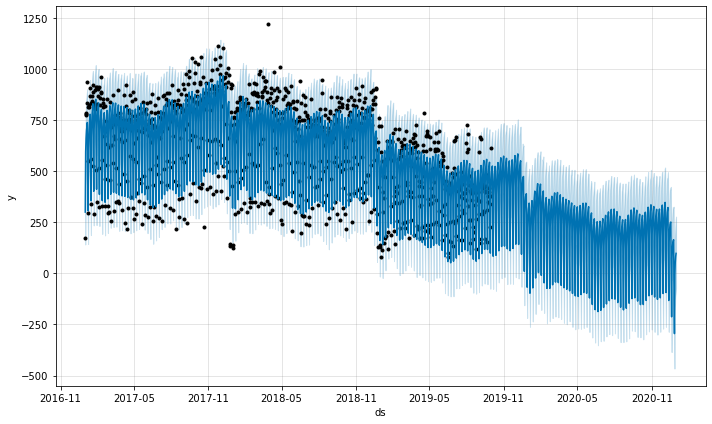

In [223]:
fig_1 = m_provincia.plot(forecast1)

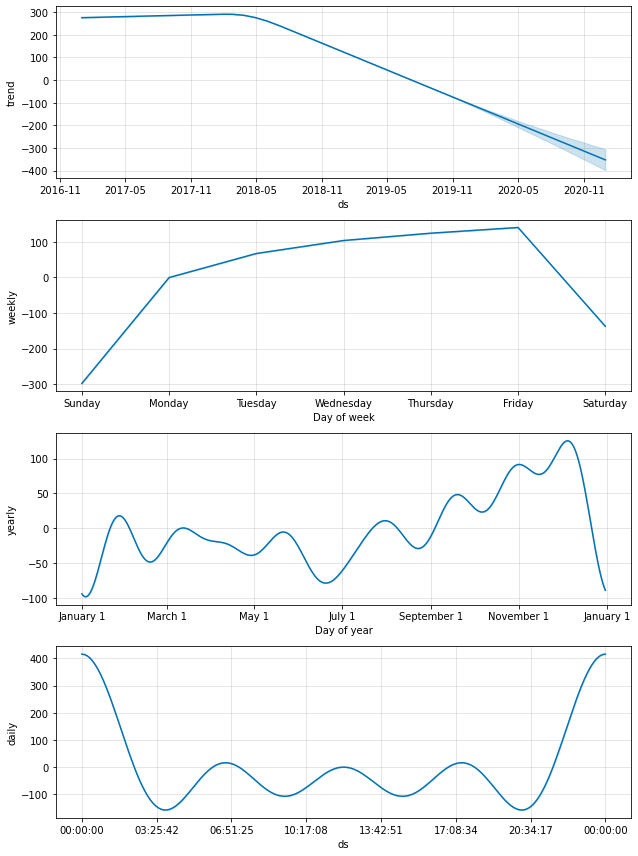

In [224]:
fig_2 = m_provincia.plot_components(forecast1)

In [225]:
prediccion1 = forecast1[['ds', 'yhat']]
prediccion1

ds        yhat
0    2017-01-01  299.531061
1    2017-01-02  594.612997
2    2017-01-03  660.889189
3    2017-01-04  697.327943
4    2017-01-05  719.013543
...         ...         ...
1456 2020-12-27 -294.736327
1457 2020-12-28   -6.144143
1458 2020-12-29   53.406923
1459 2020-12-30   82.983992
1460 2020-12-31   97.772457

[1461 rows x 2 columns]

In [226]:
%matplotlib inline
import logging

logging.getLogger('prophet').setLevel(logging.ERROR)
import warnings
warnings.filterwarnings("ignore")

from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m_provincia, forecast1)

En la gráfica de plotly podemos apreciar con detalles nuestra predicción para el año 2020.

# Parte C

1- Que te gustaría probar, por qué y como lo harías?

Me gustaria probar la libreria Holidays con el fin de ver la influencia que provocaria en nuestro modelo un día festivo. Creo que los feriados influyen notablemente en la cantidad de pasos del trafico de un peaje. Como pudimos observar los días laborales son los de mayor tráfico, además de las horas pico siempre coinciden con los hoarios de entrada y salida de las oficinas.

Para realizar esto lo haría con la libreria holidays, la documentación de la misma podemos encontrarla en el siguiente link.

https://pypi.org/project/holidays-co/

2 - Prueba rápida y resultados preliminares.

Lo primero que haremos sera intentar utilizar la libreria holiday y ver si mejora nuestro modelo, para esto solo utilizaremos el modelo con sentido provincia y lo compararemos con los resultados anteriores.

In [227]:
#Importamos la libreria.
from datetime import date
from workalendar.america import Argentina
cal = Argentina()
#Cargamos las fechas bajo estudio, en este caso año 2017-2018-2019.
holidays_2017 = pd.DataFrame(data= cal.holidays(2017))
holidays_2018 = pd.DataFrame(data= cal.holidays(2018))
holidays_2019 = pd.DataFrame(data= cal.holidays(2019))
#Combinamos los años en un solo dataframe
holidays = holidays_2017.append(holidays_2018, ignore_index=True)
holidays = holidays.append(holidays_2019, ignore_index=True)
#Combertimos la columna fecha en datetime
holidays['ds'] = pd.to_datetime(holidays[0])
#Renombramos las columnas
holidays.rename(columns={0:"fecha2" ,1: "holiday" }, inplace = True)
#Dropeamos la columna holiday, ya que no nos interesa saber el motivo del feriado.
holidays.drop("holiday", inplace= True, axis =1)
#Creamos una columna con 1, con el fin de tener un encoding antes de unir con nuestro dataset de provincia
unos = pd.DataFrame(np.ones((54, 1)))
unos.rename(columns={0: "x0_holidays"}, inplace = True)
holidays = pd.concat([holidays, unos], axis=1)

In [228]:
#Observamos el dataset obtenido
holidays.head(3)

fecha2         ds  x0_holidays
0  2017-01-01 2017-01-01          1.0
1  2017-02-27 2017-02-27          1.0
2  2017-02-28 2017-02-28          1.0

In [229]:
#Vemos el que vamos a utilizar para evaluar.
df1_provincia.head(3)

Date         ds      y  pesado_x0  day_of_week  liviano_x0
0  Domingo 2017-01-01    172        1.0            6         0.0
1  Domingo 2017-01-01  13960        0.0            6         1.0
2    Lunes 2017-01-02  22968        0.0            0         1.0

In [230]:
#Unimos ambos datasets
df1_festivos = df1_provincia.merge(holidays, left_on="ds",right_on="ds", how="left")
#Eliminamos columnas innecesarias.
df1_festivos.drop("fecha2", inplace= True, axis =1)
#Reemplazamos los nulos (dias laborables) por 0, de esta manera dejamos listo el encoding
df1_festivos['x0_holidays'] = df1_festivos['x0_holidays'].fillna(0)

In [231]:
df1_festivos.head(3)

Date         ds      y  pesado_x0  day_of_week  liviano_x0  x0_holidays
0  Domingo 2017-01-01    172        1.0            6         0.0          1.0
1  Domingo 2017-01-01  13960        0.0            6         1.0          1.0
2    Lunes 2017-01-02  22968        0.0            0         1.0          0.0

In [232]:
# Separamos en entrenamiento y prueba
provincia_train1 = df1_festivos[df1_festivos['ds']<"2019-10-01"]
provincia_test1 = df1_festivos[df1_festivos['ds']>="2019-10-01"]

In [233]:
#Agregamos columnas con los años, meses y dias, para lograr un encoding.
provincia_train1['Year'] = provincia_train1['ds'].dt.year
provincia_train1['Month'] = provincia_train1['ds'].dt.month
provincia_train1['Day'] = provincia_train1['ds'].dt.day
##
provincia_test1['Year'] = provincia_test1['ds'].dt.year
provincia_test1['Month'] = provincia_test1['ds'].dt.month
provincia_test1['Day'] = provincia_test1['ds'].dt.day

In [234]:
#Definimos las variables features y nuestro target.
target_column = ['y']
variable_features = ['pesado_x0', 'day_of_week', 'liviano_x0',
                      'Year', 'Month', 'Day','x0_holidays']

In [235]:
#X e y Train.
X_provincia_train1 = provincia_train1[variable_features]
####
y_provincia_train1 = provincia_train1[target_column]

#X e y Test.
X_provincia_test1 = provincia_test1[variable_features]
####
y_provincia_test1 = provincia_test1[target_column]

In [236]:
#Optimizamos hiperparametros
from sklearn.model_selection import GridSearchCV
import xgboost as xg 
#max_depth = 15 , objective ='reg:squarederror', n_estimators = 50, seed = 123
xgb_r_h = xg.XGBRegressor() 
param_grid = {  
    'learning_rate': [0.05, 0.06],
    'max_depth': [3,4],
    'gamma': [0.8,0.2],
    'reg_alpha': [22],
    'lambda': [0.2,0.4],
    
}

XGB_cv_h = GridSearchCV(estimator=xgb_r_h, param_grid=param_grid, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
XGB_cv_h.fit(X_provincia_train1, y_provincia_train1)
# best parameters
print(XGB_cv_h.best_params_); print(XGB_cv_h.best_score_)

{'gamma': 0.8, 'lambda': 0.4, 'learning_rate': 0.05, 'max_depth': 4, 'reg_alpha': 22}
-1152.5817920687798


In [237]:
#Evaluamos nuestro modelo y observamos si mejoro.

#evaluación del modelo en train de XGBOOST
print(f'El RMSE es: {np.sqrt(mean_squared_error(y_provincia_train1, XGB_cv_h.predict(X_provincia_train1)))}')
print(f'El MAE es: {mean_absolute_error(y_provincia_train1, XGB_cv_h.predict(X_provincia_train1))}')

El RMSE es: 1317.3934019274886
El MAE es: 704.0329780236317


In [238]:
#Comparación con modelo anterior en train
print(f'El RMSE es: {np.sqrt(mean_squared_error(y_provincia_train, XGB_cv.predict(X_provincia_train)))}')
print(f'El MAE es: {mean_absolute_error(y_provincia_train, XGB_cv.predict(X_provincia_train))}')

El RMSE es: 1421.0502981215168
El MAE es: 755.6577988792868


In [239]:
#Luego en test de XGBOOST
print(f'El RMSE es: {np.sqrt(mean_squared_error(y_provincia_test1, XGB_cv_h.predict(X_provincia_test1)))}')
print(f'El MAE es: {mean_absolute_error(y_provincia_test1, XGB_cv_h.predict(X_provincia_test1))}')

El RMSE es: 1518.2934716538796
El MAE es: 831.2346164869225


In [240]:
#Comparación con modelo anterior en test
print(f'El RMSE es: {np.sqrt(mean_squared_error(y_provincia_test, XGB_cv.predict(X_provincia_test)))}')
print(f'El MAE es: {mean_absolute_error(y_provincia_test, XGB_cv.predict(X_provincia_test))}')

El RMSE es: 1609.8180343870508
El MAE es: 877.5913490834444


## Resultados Preliminares.

Como podemos observar nuestro modelo mejoro utilizando los días festivos, seria muy bueno seguir implementando mayor información o comportamientos relevantes, como puede ser, clusterización de los días festivos para sacar un mejor provecho. Por ejemplo: días festivos que coincidan con fin de semanas largos diferenciados con los que no, esto puede causar aumento en el tráfico por vacaciones, etc.